In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime, time
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV

import joblib

<b>Data Set Information:</b>

* This dataset comprises traffic collision events where a person was either Killed or Seriously Injured (KSI) from 2006 to 2022.

* The Killed or Seriously Injured (KSI) dataset is a subset of all traffic collision events, sourced from police reports in which an officer attended the scene. This dataset specifically includes events where a person sustained a major or fatal injury due to a traffic collision.

* The goal is to build a binary classification model that predicts whether an incident will result in a fatality based on certain features.

<b> Data Fields Description </b>
* INDEX_: Unique Identifier
* ACCNUM: Accident Number
* YEAR: Year Collision Occurred
* DATE: Date Collision Occurred (time is displayed in UTC format)
* TIME: Time Collision Occurred
* STREET1: Street where Collision Occurred
* STREET2: Street where Collision Occurred
* OFFSET: Distance and direction of the Collision
* ROAD_CLASS: Road Classification
* DISTRICT: City District
* WARDNUM: City of Toronto Ward where the collision occurred
* LATITUDE: Latitude
* LONGITUDE: Longitude
* LOCCOORD: Location Coordinate
* ACCLOC: Collision Location
* TRAFFCTL: Traffic Control Type
* VISIBILITY: Environment Condition
* LIGHT: Light Condition
* RDSFCOND: Road Surface Condition
* ACCLASS: Classification of Accident
* IMPACTYPE: Initial Impact Type
* INVTYPE: Involvement Type
* INVAGE: Age of Involved Party
* INJURY: Severity of Injury
* FATAL_NO: Sequential Number
* INITDIR: Initial Direction of Travel
* VEHTYPE: Type of Vehicle
* MANOEUVER: Vehicle Manoeuver
* DRIVACT: Apparent Driver Action
* DRIVCOND: Driver Condition
* PEDTYPE: Pedestrian Crash Type - detail
* PEDACT: Pedestrian Action
* PEDCOND: Condition of Pedestrian
* CYCLISTYPE: Cyclist Crash Type - detail
* CYCACT: Cyclist Action
* CYCCOND: Cyclist Condition
* PEDESTRIAN: Pedestrian Involved In Collision
* CYCLIST: Cyclist Involved in Collision
* AUTOMOBILE: Driver Involved in Collision
* MOTORCYCLE: Motorcyclist Involved in Collision
* TRUCK: Truck Driver Involved in Collision
* TRSN_CITY_VEH: Transit or City Vehicle Involved in Collision
* EMERG_VEH: Emergency Vehicle Involved in Collision
* PASSENGER: Passenger Involved in Collision
* SPEEDING: Speeding-Related Collision
* AG_DRIV: Aggressive and Distracted Driving Collision
* REDLIGHT: Red Light-Related Collision
* ALCOHOL: Alcohol-Related Collision
* DISABILITY: Medical or Physical Disability-Related Collision
* HOOD_158: Unique ID for City of Toronto Neighbourhood (new)
* NEIGHBOURHOOD_158: City of Toronto Neighbourhood name (new)
* HOOD_140: Unique ID for City of Toronto Neighbourhood (old)
* NEIGHBOURHOOD_140: City of Toronto Neighbourhood name (old)
* DIVISION: Toronto Police Service Division
* ObjectID: Unique Identifier (auto-generated)

In [78]:
TRAIN_DATA_PATH = "train.csv"
TEST_DATA_PATH = "test.csv"

In [79]:
# Reading train and test data set
def load_traffic_collision_data():
    train_data =  pd.read_csv(TRAIN_DATA_PATH, keep_default_na=False)
    test_data = pd.read_csv(TEST_DATA_PATH)
    return train_data, test_data


In [80]:
trf_collision_train_df, trf_collision_test_df = load_traffic_collision_data()

In [81]:
trf_collision_train_df.replace('', np.nan, inplace = True)
trf_collision_test_df.replace('', np.nan, inplace = True)

### Part 1: Basic dataset exploration with head(), info(), shape(), describe(), and dtypes() 

In [82]:
trf_collision_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  15000 non-null  float64
 1   Y                  15000 non-null  float64
 2   OBJECTID           15000 non-null  int64  
 3   INDEX_             15000 non-null  int64  
 4   ACCNUM             11302 non-null  object 
 5   DATE               15000 non-null  object 
 6   TIME               15000 non-null  int64  
 7   STREET1            15000 non-null  object 
 8   STREET2            13657 non-null  object 
 9   OFFSET             1928 non-null   object 
 10  ROAD_CLASS         14643 non-null  object 
 11  DISTRICT           14984 non-null  object 
 12  LATITUDE           15000 non-null  float64
 13  LONGITUDE          15000 non-null  float64
 14  ACCLOC             9550 non-null   object 
 15  TRAFFCTL           14971 non-null  object 
 16  VISIBILITY         149

In [83]:
# shape of train dataset
trf_collision_train_df.shape

(15000, 54)

In [84]:
# shape of test dataset
trf_collision_test_df.shape

(3956, 53)

In [85]:
trf_collision_train_df.dtypes

X                    float64
Y                    float64
OBJECTID               int64
INDEX_                 int64
ACCNUM                object
DATE                  object
TIME                   int64
STREET1               object
STREET2               object
OFFSET                object
ROAD_CLASS            object
DISTRICT              object
LATITUDE             float64
LONGITUDE            float64
ACCLOC                object
TRAFFCTL              object
VISIBILITY            object
LIGHT                 object
RDSFCOND              object
ACCLASS               object
IMPACTYPE             object
INVTYPE               object
INVAGE                object
INJURY                object
FATAL_NO              object
INITDIR               object
VEHTYPE               object
MANOEUVER             object
DRIVACT               object
DRIVCOND              object
PEDTYPE               object
PEDACT                object
PEDCOND               object
CYCLISTYPE            object
CYCACT        

In [86]:
# Summary Statistics for Numerical Columns for train dataset
trf_collision_train_df.describe()

X             Y      OBJECTID        INDEX_          TIME  \
count   15000.000000  1.500000e+04  15000.000000  1.500000e+04  15000.000000   
mean   629153.512858  4.841002e+06   7500.500000  2.897643e+07   1347.332800   
std      8344.052668  6.308487e+03   4330.271354  3.465401e+07    631.600998   
min    609625.702600  4.827606e+06      1.000000  3.363207e+06      0.000000   
25%    623285.400000  4.835641e+06   3750.750000  5.293513e+06    908.000000   
50%    629170.845000  4.840093e+06   7500.500000  6.714110e+06   1438.000000   
75%    635347.214800  4.846111e+06  11250.250000  8.024356e+07   1840.000000   
max    650784.244600  4.857444e+06  15000.000000  8.154201e+07   2359.000000   

           LATITUDE     LONGITUDE  
count  15000.000000  15000.000000  
mean      43.710768    -79.396827  
std        0.056158      0.104224  
min       43.592047    -79.638390  
25%       43.662649    -79.470042  
50%       43.702807    -79.397632  
75%       43.756457    -79.319190  
max       43.855445    -79.125896

In [87]:
trf_collision_test_df.describe()

X             Y      OBJECTID        INDEX_        ACCNUM  \
count    3956.000000  3.956000e+03   3956.000000  3.956000e+03  2.724000e+03   
mean   629288.330137  4.840756e+06  16978.601871  8.150876e+07  1.545489e+09   
std      8442.033181  6.383040e+03   1142.301680  2.149523e+05  1.110291e+09   
min    610951.529000  4.827328e+06  15001.000000  8.079371e+07  2.530100e+04   
25%    622799.746000  4.835246e+06  15989.750000  8.142130e+07  1.000186e+09   
50%    629283.490850  4.839895e+06  16978.500000  8.154232e+07  2.000416e+09   
75%    635878.989675  4.845868e+06  17967.250000  8.166733e+07  3.000047e+09   
max    651024.087800  4.856518e+06  18957.000000  8.180752e+07  4.000062e+09   

              TIME     LATITUDE    LONGITUDE    FATAL_NO  
count  3956.000000  3956.000000  3956.000000  276.000000  
mean   1431.630435    43.708528   -79.395209   28.728261  
std     625.818929     0.056786     0.105478   17.515564  
min       1.000000    43.589678   -79.621974    1.000000  
25%    1014.000000    43.658805   -79.476459   13.750000  
50%    1542.500000    43.701409   -79.395961   27.500000  
75%    1920.500000    43.754660   -79.312740   42.000000  
max    2359.000000    43.847045   -79.122974   66.000000

In [88]:
# Summary Statistics for Categorical Columns
trf_collision_train_df.describe(include='object')

ACCNUM                    DATE   STREET1         STREET2  \
count     11302                   15000     15000           13657   
unique     3822                    3082      1547            2344   
top     1311498  2014/08/17 08:00:00+00  YONGE ST  LAWRENCE AVE E   
freq         19                      35       322             132   

              OFFSET      ROAD_CLASS               DISTRICT           ACCLOC  \
count           1928           14643                  14984             9550   
unique           335               9                      4                9   
top     10 m North o  Major Arterial  Toronto and East York  At Intersection   
freq              29           10698                   5216             7044   

          TRAFFCTL VISIBILITY  ... SPEEDING AG_DRIV REDLIGHT ALCOHOL  \
count        14971      14986  ...     1998    7696     1275     672   
unique          10          8  ...        1       1        1       1   
top     No Control      Clear  ...      Yes     Yes      Yes     Yes   
freq          7271      12869  ...     1998    7696     1275     672   

       DISABILITY HOOD_158       NEIGHBOURHOOD_158 HOOD_140  \
count         420    15000                   15000    15000   
unique          1      159                     159      141   
top           Yes        1  West Humber-Clairville       77   
freq          420      498                     498      561   

                             NEIGHBOURHOOD_140 DIVISION  
count                                    15000    15000  
unique                                     141       17  
top     Waterfront Communities-The Island (77)      D42  
freq                                       561     1446  

[4 rows x 47 columns]

In [89]:
# Summary Statistics for Categorical Columns
trf_collision_test_df.describe(include='object')

DATE      STREET1      STREET2       OFFSET  \
count                     3956         3956         3593         1892   
unique                    1047          633          918          323   
top     2020/09/04 08:00:00+00  DUFFERIN ST  BATHURST ST  5 m East of   
freq                        16           83           40           45   

            ROAD_CLASS               DISTRICT           ACCLOC  \
count             3827                   3743             3950   
unique               9                      4                7   
top     Major Arterial  Toronto and East York  At Intersection   
freq              2678                   1111             1729   

              TRAFFCTL VISIBILITY     LIGHT  ... SPEEDING AG_DRIV REDLIGHT  \
count             3910       3946      3952  ...      695    2139      302   
unique               6          8         9  ...        1       1        1   
top     Traffic Signal      Clear  Daylight  ...      Yes     Yes      Yes   
freq              1800       3503      2095  ...      695    2139      302   

       ALCOHOL DISABILITY HOOD_158       NEIGHBOURHOOD_158 HOOD_140  \
count      136         72     3956                    3956     3956   
unique       1          1      159                     159      141   
top        Yes        Yes        1  West Humber-Clairville       77   
freq       136         72       99                      99      179   

                             NEIGHBOURHOOD_140 DIVISION  
count                                     3956     3956  
unique                                     141       17  
top     Waterfront Communities-The Island (77)      D22  
freq                                       179      373  

[4 rows x 44 columns]

#### In the above column type as we can see that the 'DATE' and 'TIME' Column is of object type we need to convert this columns to appropritate data type

### Part 2: Dataset exploration with visualization And Dropping the column according to visualisation

C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future ve

Text(0.5, 1.0, 'Pairplot')

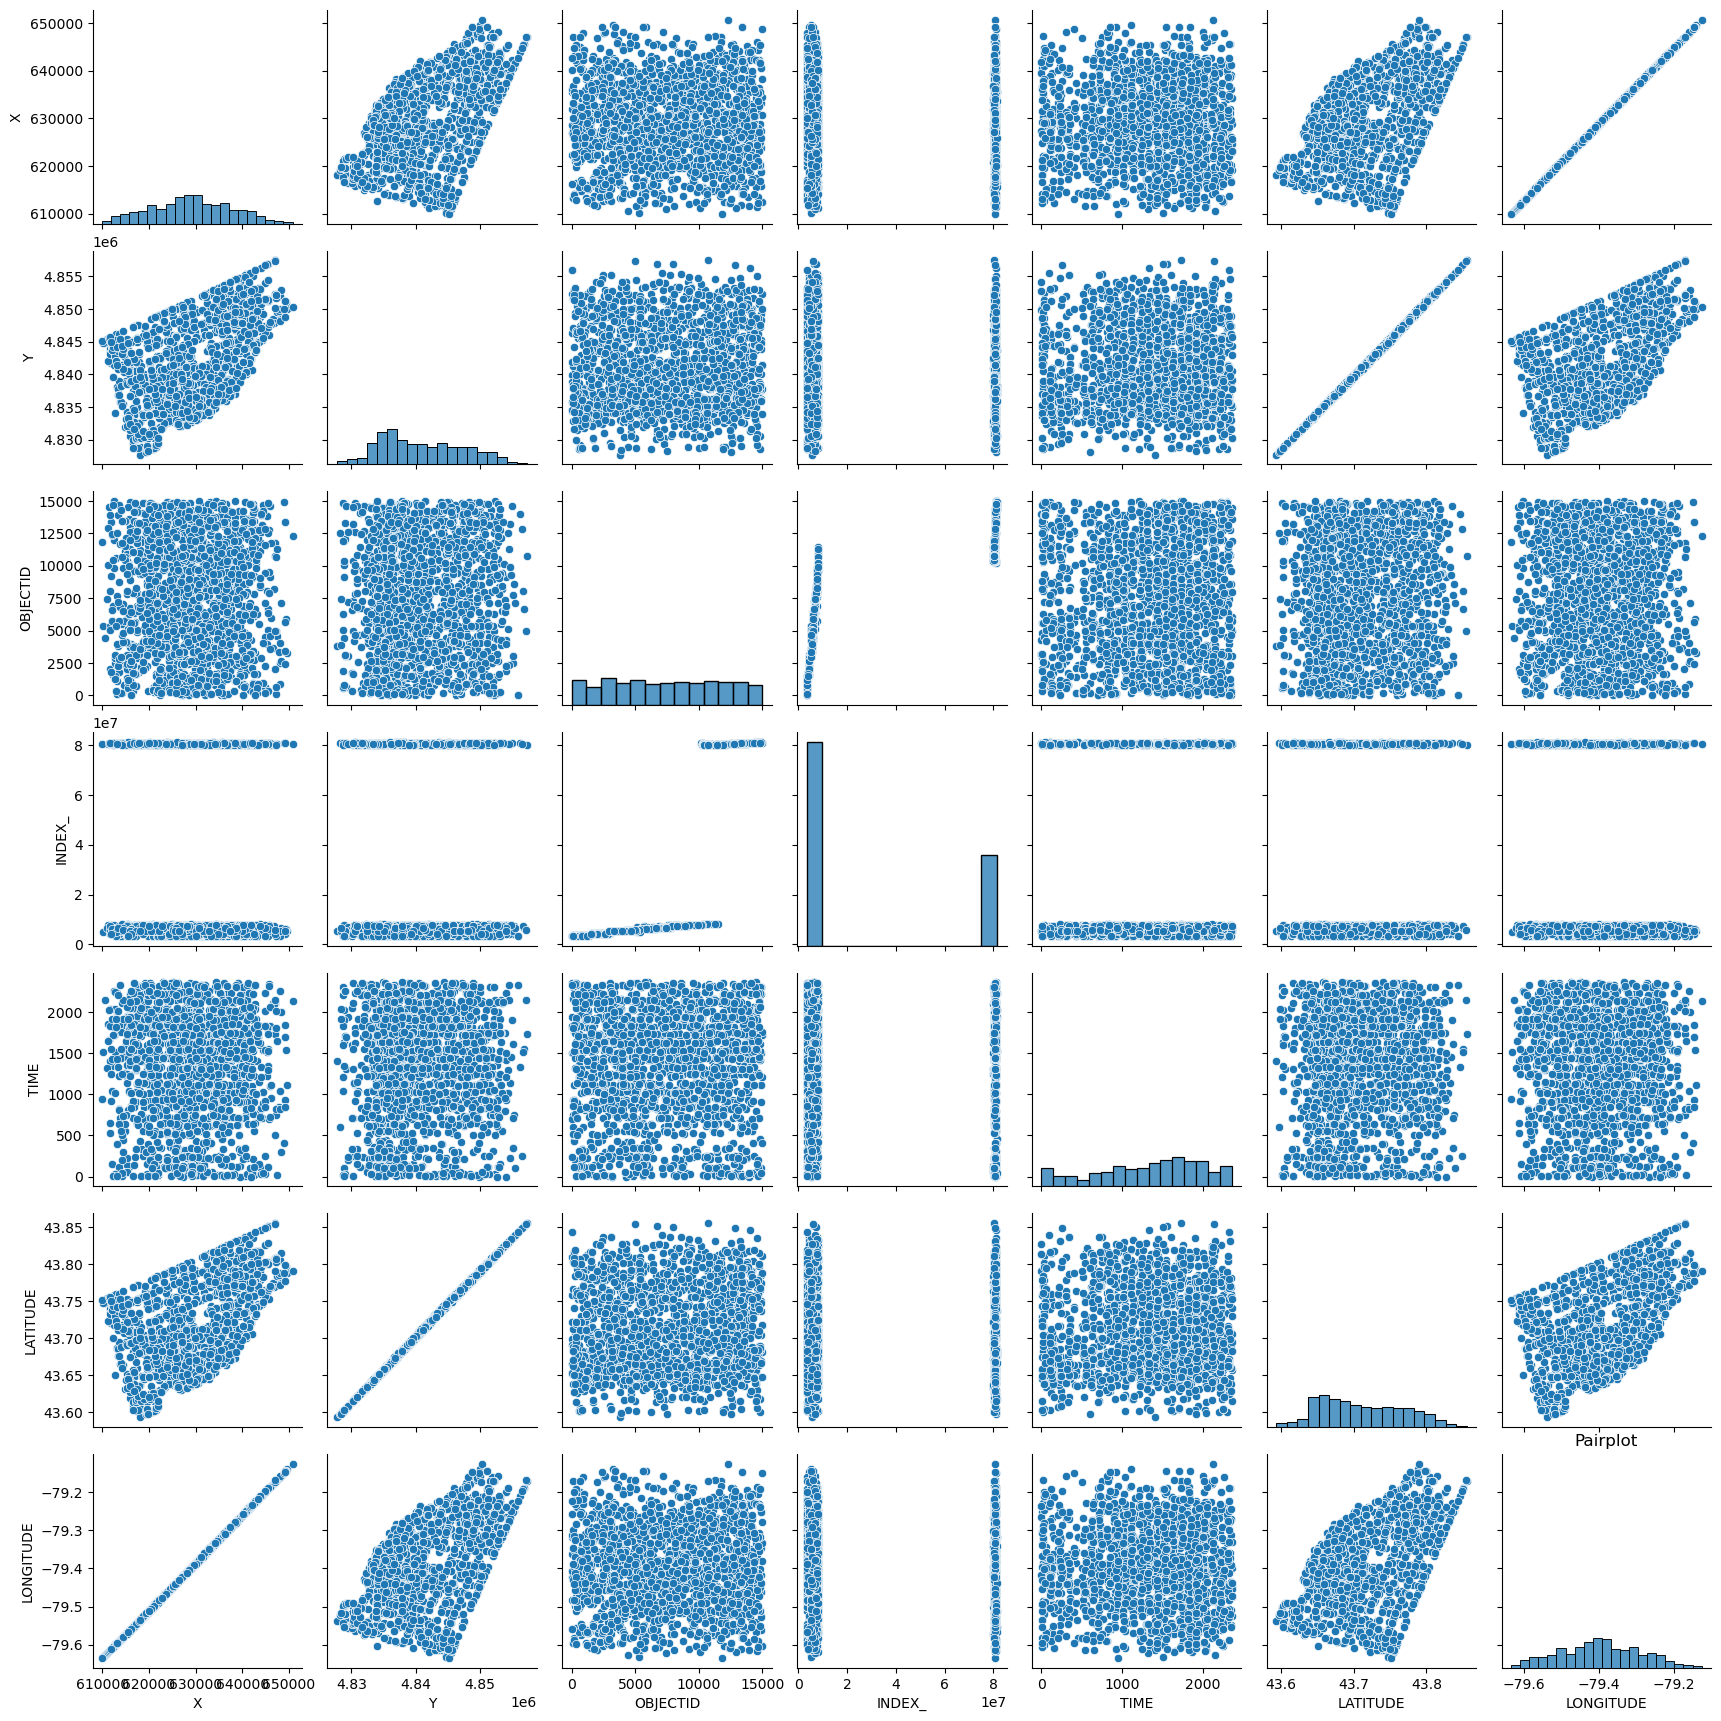

In [90]:
#using pandas
g = sns.pairplot(trf_collision_train_df.sample(2000))
plt.title ('Pairplot')

#### According to visualisation X and Y feature distribution is same a LONGITUDE and LATITUDE so we will drop X and Y at later time

In [91]:
# Distribution of accident accordigng to logitude and latitude and with the ditribution of accident using ACCLASS
fig = px.scatter_mapbox(trf_collision_train_df, lat='LATITUDE', lon='LONGITUDE', color = 'ACCLASS',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=9,
                  mapbox_style="carto-positron")
fig.show()

### "INJURY" COLUMN

In [92]:
# To visualize distribution for INJURY first let's check the unique values
trf_collision_train_df['INJURY'].unique()

array(['Major', nan, 'None', 'Minor', 'Fatal', 'Minimal'], dtype=object)

In [93]:
def plot_injury_distribution(dataframe, column='INJURY', title='Distribution of Injury Types Including None Values'):
    """
    Plots a histogram for the specified target variable to visualize the distribution of injury types.
    """
    # Plot the histogram
    fig = px.histogram(dataframe, x=column, title=title)

    # Update the layout to handle None values and order categories
    fig.update_layout(
        xaxis_title='Injury Type',
        yaxis_title='Count',
        xaxis=dict(categoryorder='array', categoryarray=['Major', 'Minor', 'Minimal', 'Fatal', 'None'])
    )

    # Show the figure
    fig.show()

# Plot Injury for train dataset
plot_injury_distribution(trf_collision_train_df)

#### From the above visulization we can see that "NONE" that is no injury value is the highest in this feature and "Major" value is the second highest for the column INJURY.

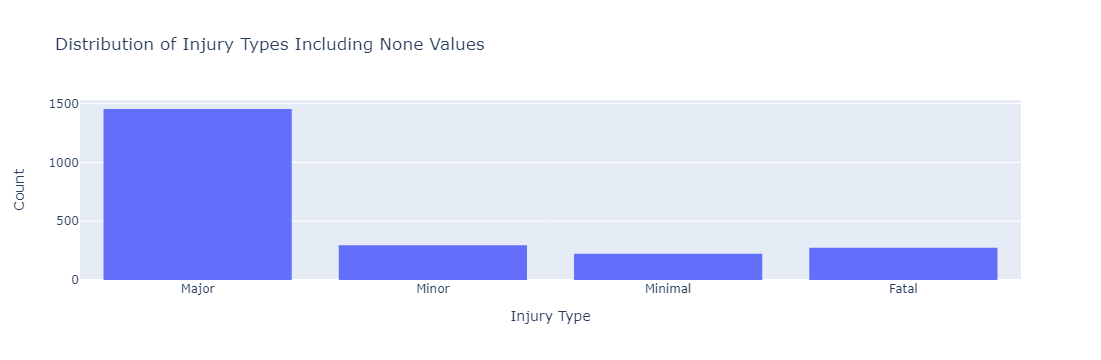

In [94]:
# Plot Injury for test dataset
plot_injury_distribution(trf_collision_test_df)

#### As we can see from above abve histogram, for most of the incident there is No Injury and there is still huge number of incidents with Major injury but only few with fatal

In [95]:
trf_collision_train_df.isna().sum()

X                        0
Y                        0
OBJECTID                 0
INDEX_                   0
ACCNUM                3698
DATE                     0
TIME                     0
STREET1                  0
STREET2               1343
OFFSET               13072
ROAD_CLASS             357
DISTRICT                16
LATITUDE                 0
LONGITUDE                0
ACCLOC                5450
TRAFFCTL                29
VISIBILITY              14
LIGHT                    0
RDSFCOND                19
ACCLASS                  0
IMPACTYPE                0
INVTYPE                 10
INVAGE                   0
INJURY                1607
FATAL_NO             14407
INITDIR               4498
VEHTYPE               2056
MANOEUVER             6514
DRIVACT               7575
DRIVCOND              7579
PEDTYPE              12540
PEDACT               12550
PEDCOND              12555
CYCLISTYPE           14365
CYCACT               14379
CYCCOND              14380
PEDESTRIAN            9034
C

#### Visulize the pattern to find understand the pattern in the missing data

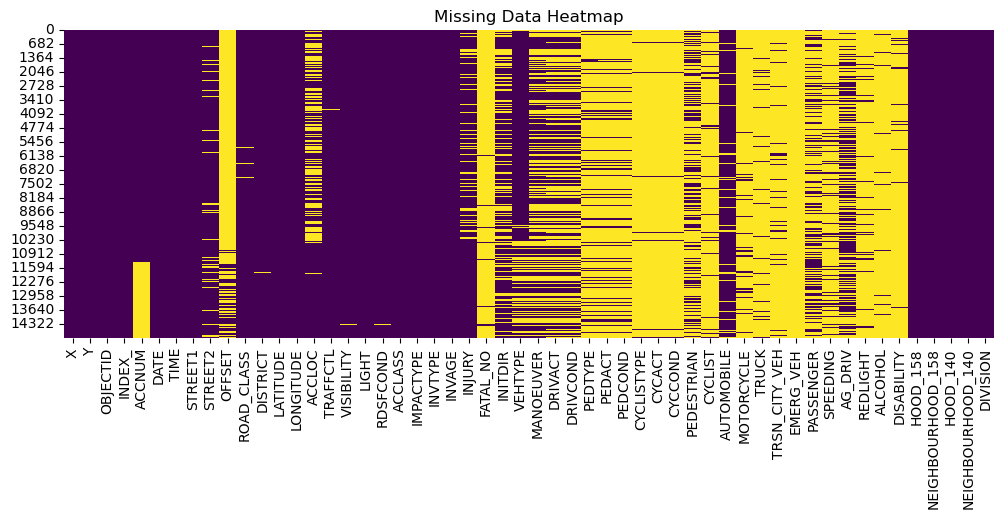

In [96]:
# Visualize the pattern of missing data
plt.figure(figsize=(12, 4))
sns.heatmap(trf_collision_train_df.isna(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

### DROPPING THE COLUMNS

#### According to the missing value heatmap, ACCNUM started missing after 10,500 records. There can be multiple reason for that such as,
* **Data Entry Errors:** The null values might be due to errors or omissions during data entry.
* **Incomplete Data:** The records with null ACCNUM could be incomplete or partial records that were not fully captured.
* **Non-unique Events:** There might be scenarios where the accident number was not assigned or was not available at the time of recording.

#### Checking the distribution of INITDIR wit regards to INJURY

In [97]:
trf_collision_train_df['INITDIR'].isna().sum()

4498

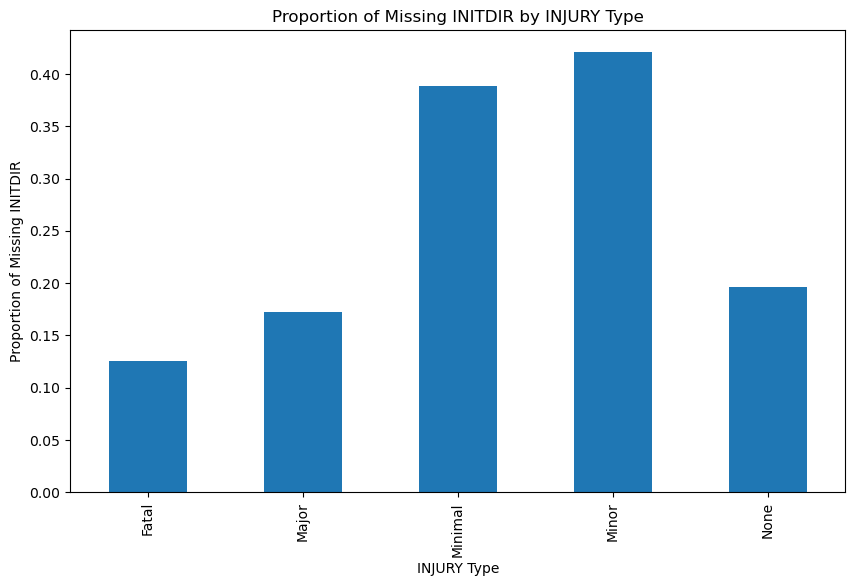

In [98]:
# Calculate the proportion of missing INITDIR values for each category in INJURY
missing_initdir_by_injury = trf_collision_train_df.groupby('INJURY')['INITDIR'].apply(lambda x: x.isnull().mean())

# Visualize the proportion of missing INITDIR values for each category in INJURY
missing_initdir_by_injury.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Missing INITDIR by INJURY Type')
plt.xlabel('INJURY Type')
plt.ylabel('Proportion of Missing INITDIR')
plt.show()

#### The proportion of missing INITDIR values is highest for minor injuries, followed by minimal injuries, major injuries, and none injuries. Fatal injuries have the lowest proportion of missing INITDIR values. This suggests that INITDIR is more likely to be missing for less severe injuries. This could be due to a number of factors, such as the fact that less severe injuries are less likely to be reported to the police, or that less severe injuries are less likely to result in a police investigation.

In [99]:
# Cheking the columns from the dataset
trf_collision_train_df.columns

Index(['X', 'Y', 'OBJECTID', 'INDEX_', 'ACCNUM', 'DATE', 'TIME', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'LATITUDE', 'LONGITUDE',
       'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT',
       'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140',
       'DIVISION'],
      dtype='object')

### Dropping the unnecessary columns
1. **X and Y:** We are dropping this both column as they contain same values that are already in LATITUDE and LONGITUDE COLUMNS.
2. **OBJECTID and INDEX_:** This both are unique identifier in our dataset so this columns are not useful in predicting.
3. **OFFSET and FATAL_NO:** This both column mostly contain null value so we are dropping this both columns.
4. **DRIVACT and INITDIR:** This both columns will not be useful for predicting, so we are dropping these columns.
5. **ACCNUM:** This column contains details on accident number which is another values which will not be useful, when we check for the values in this column we found that the missing data is after 10500 values which can be due to multiple reason but as we  donot have a need for this column; we will be dropping this.
6. **DATE:** This column contains the date of the accident which is not useful so we are dropping this column.

In [100]:
# Dropping unwanted columns from both TRAIN and TEST Dataframe
trf_collision_train_df.drop(columns = ['X', 'Y', 'OBJECTID', 'INDEX_', 'OFFSET', 'FATAL_NO', 'INITDIR', 'DRIVACT', 'DRIVCOND', 'ACCNUM', 'DATE'], inplace = True)
trf_collision_test_df.drop(columns = ['X', 'Y', 'INDEX_', 'OFFSET', 'FATAL_NO', 'INITDIR', 'DRIVACT', 'DRIVCOND', 'ACCNUM', 'DATE'], inplace = True)

In [101]:
# Cheking the columns from the dataset after dropping columns
trf_collision_train_df.columns

Index(['TIME', 'STREET1', 'STREET2', 'ROAD_CLASS', 'DISTRICT', 'LATITUDE',
       'LONGITUDE', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'VEHTYPE',
       'MANOEUVER', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION'],
      dtype='object')

#### Checking for unique values in specific columns

In [102]:
def check_unique_values(df, columns):
    """
    Prints unique values for each specified column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.
    columns (list): List of column names to check for unique values.
    """
    for column in columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}\n")


# List of columns to check
columns_to_check = [
    'CYCLIST', 'AUTOMOBILE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER',
    'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY'
]

# Calling the function
check_unique_values(trf_collision_train_df, columns_to_check)

Unique values in column 'CYCLIST': [nan 'Yes']

Unique values in column 'AUTOMOBILE': ['Yes' nan]

Unique values in column 'TRUCK': [nan 'Yes']

Unique values in column 'TRSN_CITY_VEH': [nan 'Yes']

Unique values in column 'PASSENGER': ['Yes' nan]

Unique values in column 'SPEEDING': ['Yes' nan]

Unique values in column 'AG_DRIV': ['Yes' nan]

Unique values in column 'REDLIGHT': [nan 'Yes']

Unique values in column 'ALCOHOL': ['Yes' nan]

Unique values in column 'DISABILITY': [nan 'Yes']



#### As we can see all the above columns and either "Yes" or "NaN" so we will replace "NaN" with "No"

### Handling DISTRICT and STREET COLUMN

#### This function takes a DataFrame, the street column name, and the district column name as input. It then creates a mapping from street names to the most frequent district associated with that street, and uses this mapping to impute missing district values.

Train Data Before Imputation


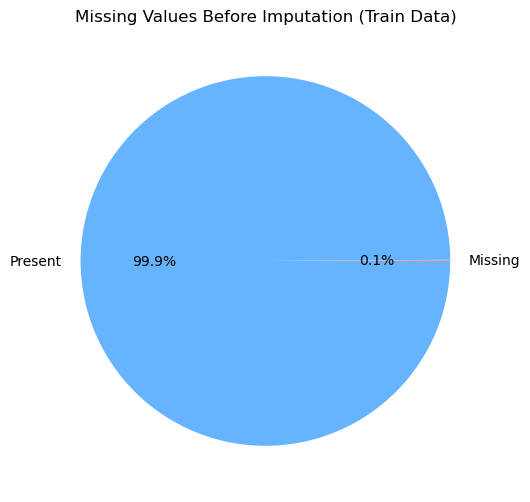

Test Data Before Imputation


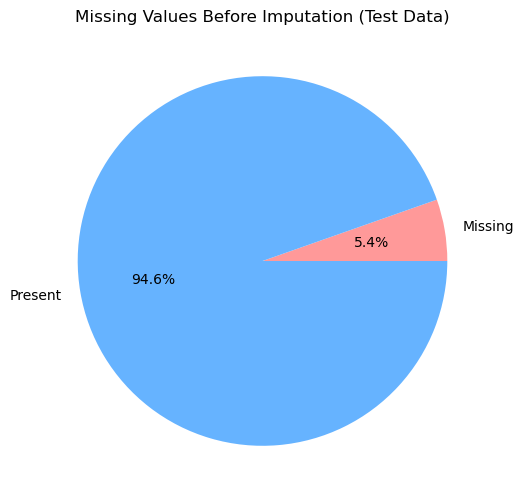

In [103]:
# Function to visulize using pirchart using the missing values 
def plot_missing_values(df, column, title):
    missing_values = df[column].isna().sum()
    total_values = len(df)
    plt.figure(figsize=(6, 6))
    plt.pie([missing_values, total_values - missing_values], labels=['Missing', 'Present'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
    plt.title(title)
    plt.show()

# Plotting before imputation
print("Train Data Before Imputation")
plot_missing_values(trf_collision_train_df, 'DISTRICT', 'Missing Values Before Imputation (Train Data)')

print("Test Data Before Imputation")
plot_missing_values(trf_collision_test_df, 'DISTRICT', 'Missing Values Before Imputation (Test Data)')

Train Data After Imputation


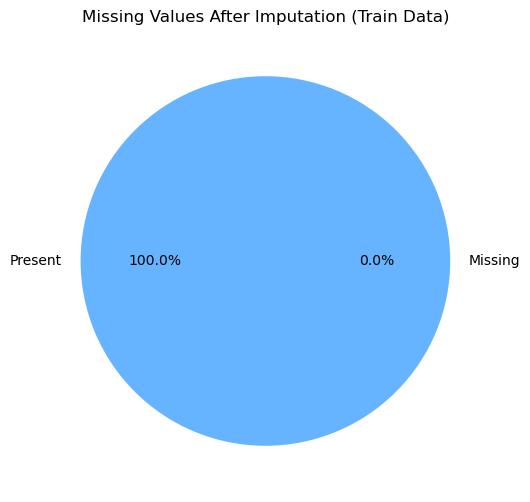

Test Data After Imputation


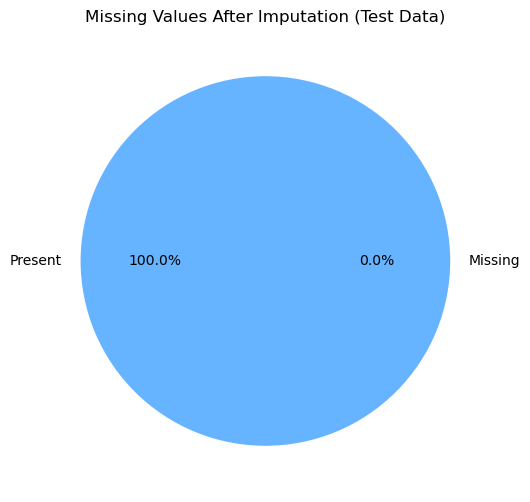

In [104]:
# Function for imputing from street1 column
def impute_district_from_steet1(df, street_col='STREET1', district_col='DISTRICT'):
    """
    Impute missing values in the DISTRICT column based on the STEET1 column.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the columns to be processed.
    street_col (str): The name of the column containing street information.
    district_col (str): The name of the column containing district information.

    Returns:
    pd.DataFrame: A DataFrame with missing DISTRICT values imputed based on STEET1.
    """
    
    # Automatically create a mapping from STEET1 to DISTRICT based on mode
    street1_to_district_mapping = df.groupby(street_col)[district_col].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

    # Function to fill missing DISTRICT values based on STEET1
    def impute_district(row):
        if pd.isna(row[district_col]) and row[street_col] in street1_to_district_mapping:
            return street1_to_district_mapping[row[street_col]]
        return row[district_col]

    # Apply the imputation function
    df[district_col] = df.apply(impute_district, axis=1)
    
    return df

# Imputing missing values
trf_collision_train_df = impute_district_from_steet1(trf_collision_train_df)
trf_collision_test_df = impute_district_from_steet1(trf_collision_test_df)

# Further impute remaining missing values using mode
def impute_remaining_with_mode(df, column):
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)
    return df

trf_collision_train_df = impute_remaining_with_mode(trf_collision_train_df, 'DISTRICT')
trf_collision_test_df = impute_remaining_with_mode(trf_collision_test_df, 'DISTRICT')

# Plotting after imputation
print("Train Data After Imputation")
plot_missing_values(trf_collision_train_df, 'DISTRICT', 'Missing Values After Imputation (Train Data)')

print("Test Data After Imputation")
plot_missing_values(trf_collision_test_df, 'DISTRICT', 'Missing Values After Imputation (Test Data)')

#### As we can see from the above piechart that before we had missing around 5% in our TEST dataset and 0.1% in our TRAIN data set but after handling them we have reduced that to 0% and 2% for TRAIN and TEST respectively.

### "ROAD_CLASS" COLUMN

In [105]:
trf_collision_train_df['ROAD_CLASS'].unique()

array(['Major Arterial', 'Minor Arterial', 'Collector', 'Local', nan,
       'Other', 'Pending', 'Laneway', 'Expressway', 'Expressway Ramp'],
      dtype=object)

Train Data Before Imputation


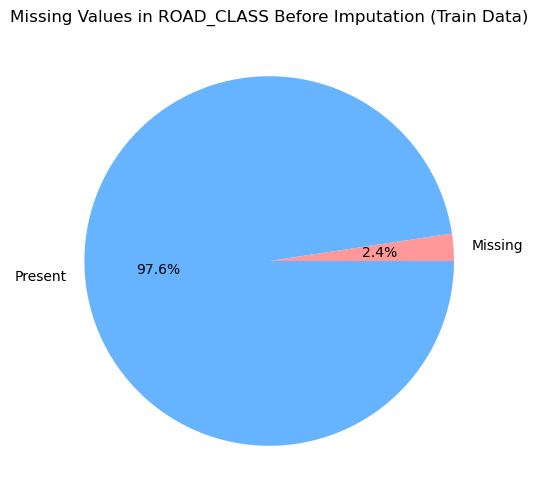

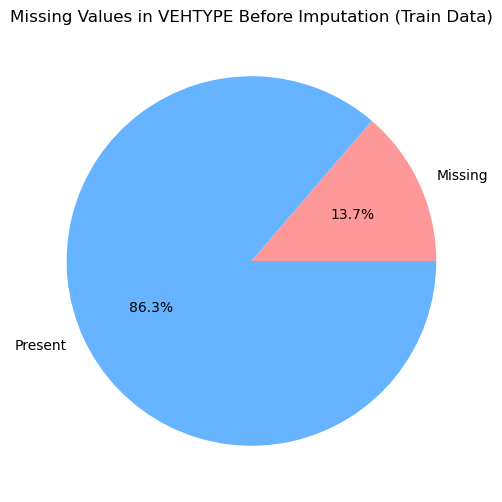

Test Data Before Imputation


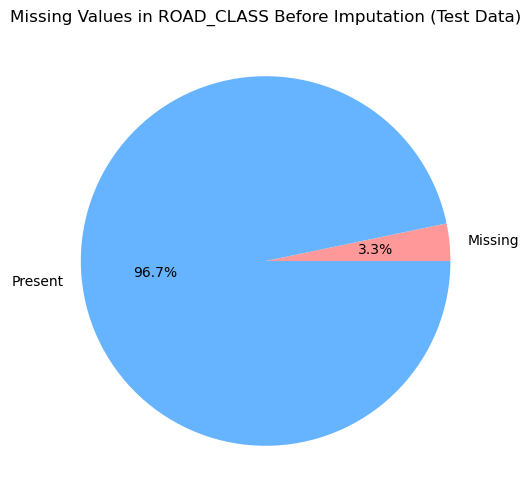

In [106]:
# Plotting before imputation
print("Train Data Before Imputation")
plot_missing_values(trf_collision_train_df, 'ROAD_CLASS', 'Missing Values in ROAD_CLASS Before Imputation (Train Data)')
plot_missing_values(trf_collision_train_df, 'VEHTYPE', 'Missing Values in VEHTYPE Before Imputation (Train Data)')

print("Test Data Before Imputation")
plot_missing_values(trf_collision_test_df, 'ROAD_CLASS', 'Missing Values in ROAD_CLASS Before Imputation (Test Data)')
plot_missing_values(trf_collision_test_df, 'VEHTYPE', 'Missing Values in VEHTYPE Before Imputation (Test Data)')

Train Data After Imputation


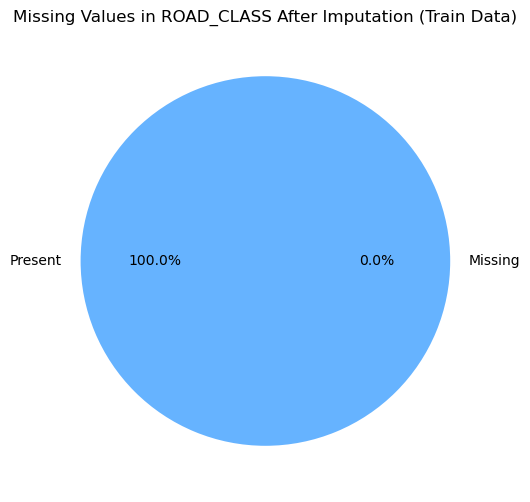

Test Data After Imputation


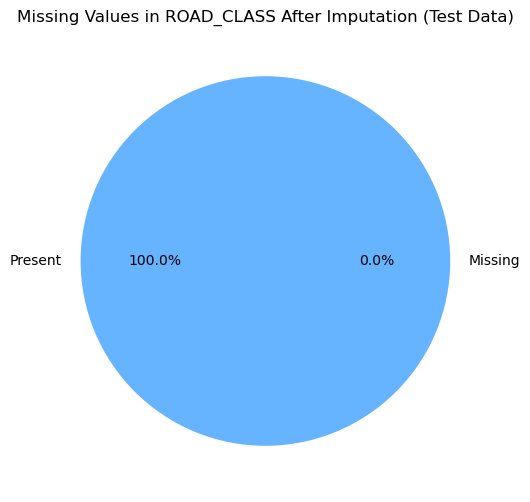

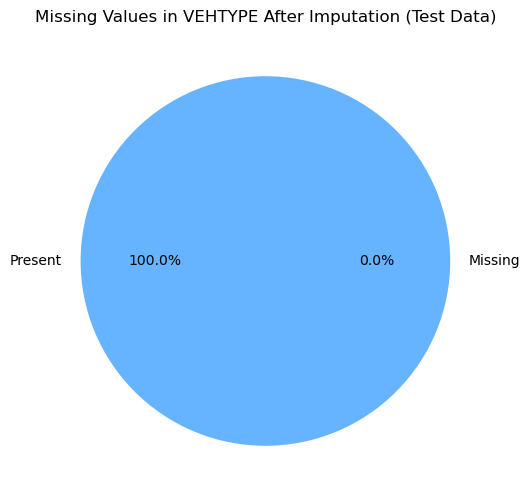

In [107]:
# The code implements a custom imputer specifically designed for handling missing values in the 'ROAD_CLASS' 
# and 'VEHTYPE' columns of a dataset. It leverages K-Nearest Neighbors (KNN) imputation for numerical values 
# and label encoding for categorical values.
class RoadVehTypeImputer:
    def __init__(self, n_neighbors=5):
        self.imputer = KNNImputer(n_neighbors=n_neighbors)
        self.label_encoders = {}

    def fit_transform(self, df):
        # Label encode the categorical features
        for column in ['ROAD_CLASS', 'VEHTYPE']:
            le = LabelEncoder()
            df[column] = df[column].astype(str).fillna('missing')
            le.fit(df[column])
            df[column] = le.transform(df[column])
            self.label_encoders[column] = le
        
        self.fitted_data = self.imputer.fit_transform(df[['ROAD_CLASS', 'VEHTYPE']])
        df[['ROAD_CLASS', 'VEHTYPE']] = self.fitted_data
        return df

    def transform(self, df):
        # Transform using the same label encoders
        for column in ['ROAD_CLASS', 'VEHTYPE']:
            le = self.label_encoders[column]
            df[column] = df[column].astype(str).fillna('missing')
            # Handle previously unseen labels
            df[column] = df[column].apply(lambda x: x if x in le.classes_ else 'unknown')
            le.classes_ = np.append(le.classes_, 'unknown')
            df[column] = le.transform(df[column])
        
        df[['ROAD_CLASS', 'VEHTYPE']] = self.imputer.transform(df[['ROAD_CLASS', 'VEHTYPE']])
        return df

# Create the imputer instance
imputer = RoadVehTypeImputer(n_neighbors=5)

# Fit and transform the training dataframe
trf_collision_train_df = imputer.fit_transform(trf_collision_train_df)

# Transform the test dataframe
trf_collision_test_df = imputer.transform(trf_collision_test_df)

# Plotting after imputation
print("Train Data After Imputation")
plot_missing_values(trf_collision_train_df, 'ROAD_CLASS', 'Missing Values in ROAD_CLASS After Imputation (Train Data)')
plot_missing_values(trf_collision_train_df, 'VEHTYPE', 'Missing Values in VEHTYPE After Imputation (Train Data)')

print("Test Data After Imputation")
plot_missing_values(trf_collision_test_df, 'ROAD_CLASS', 'Missing Values in ROAD_CLASS After Imputation (Test Data)')
plot_missing_values(trf_collision_test_df, 'VEHTYPE', 'Missing Values in VEHTYPE After Imputation (Test Data)')

#### We can see from the above pie chart that we have handled all the missing values.

### "INJURY" COLUMN

In [108]:
trf_collision_train_df['INJURY'].value_counts()

INJURY
None       5584
Major      4991
Minor      1181
Minimal     936
Fatal       701
Name: count, dtype: int64

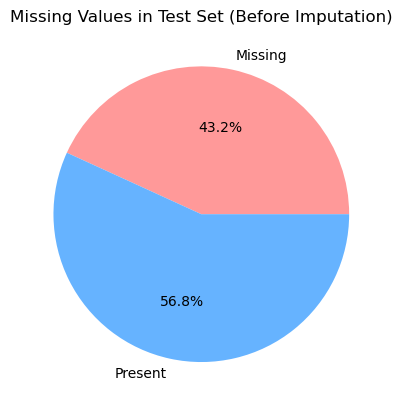

'ACCLASS' column is not available in the test dataframe. Skipping imputation for the test set.


C:\Users\MIS\AppData\Local\Temp\ipykernel_21044\2851485506.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\MIS\AppData\Local\Temp\ipykernel_21044\2851485506.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\MIS\AppData\Local\Temp\ipykernel_21044\2851485506.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

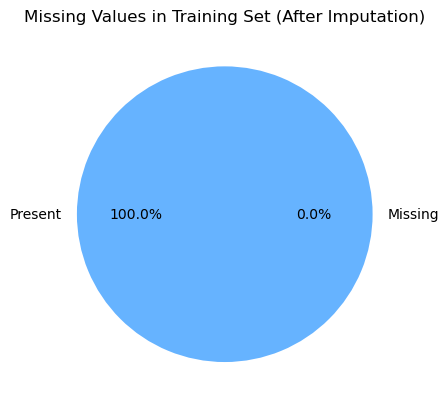

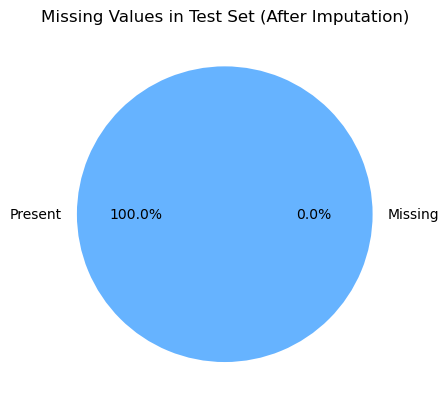

In [109]:
# Define the InjuryImputer class
class InjuryImputer:
    def __init__(self, df):
        self.df = df.copy()
        self.label_encoder = LabelEncoder()

    def impute_fatal(self):
        """
            Imputes 'INJURY' with 'Fatal' for cases where 'INJURY' is missing but 'ACCLASS' is 'Fatal'. 
            This rule-based imputation assumes that if an accident is fatal, the 'INJURY' is also likely 'Fatal'.
        """
        if 'ACCLASS' in self.df.columns:
            self.df.loc[(self.df['ACCLASS'] == 'Fatal') & (self.df['INJURY'].isna()), 'INJURY'] = 'Fatal'
    
    def encode_injury(self, df):
        """
            Encodes the 'INJURY' column into numerical values, handling missing values appropriately.
            Replaces missing values ('NaNs') in 'INJURY' with a placeholder string 'missing'.
            Uses LabelEncoder to map the unique 'INJURY' categories to numerical values
        """
        df['INJURY'] = df['INJURY'].astype(str).fillna('missing')
        df['INJURY_encoded'] = self.label_encoder.fit_transform(df['INJURY'])
        df['INJURY_encoded'] = df['INJURY_encoded'].where(df['INJURY'] != 'missing', np.nan)
        return df

    def bayesian_imputation(self, df):
        """
            Imputes missing 'INJURY' values using BayesianRidge regression for cases where 'ACCLASS' is 'Non-Fatal Injury'.
            Creates an IterativeImputer object with a BayesianRidge estimator, 
            which iteratively imputes missing values using Bayesian linear regression.
        """
        imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
        df['INJURY_encoded'] = imputer.fit_transform(df[['INJURY_encoded']])
        df['INJURY_encoded'] = np.round(df['INJURY_encoded']).astype(int)
        df['INJURY'] = self.label_encoder.inverse_transform(df['INJURY_encoded'])
        return df

    def impute_non_fatal(self):
        """
            Applies the Bayesian imputation strategy to 'INJURY' for cases where 'ACCLASS' is 'Non-Fatal Injury'.
            Filters the DataFrame to select only rows where 'ACCLASS' is 'Non-Fatal Injury'.
        """
        if 'ACCLASS' in self.df.columns:
            non_fatal_df = self.df[self.df['ACCLASS'] == 'Non-Fatal Injury']
            non_fatal_df = self.encode_injury(non_fatal_df)
            non_fatal_df = self.bayesian_imputation(non_fatal_df)
            self.df.update(non_fatal_df)
            self.df.drop(columns=['INJURY_encoded'], inplace=True, errors='ignore')

    def impute(self):
        """Run the complete imputation process."""
        self.impute_fatal()
        self.impute_non_fatal()
        return self.df

# Define the function to plot missing values
def plot_missing_values(df, column, title):
    missing_values = df[column].isna().sum()
    total_values = len(df)
    plt.pie([missing_values, total_values - missing_values], labels=['Missing', 'Present'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
    plt.title(title)
    plt.show()

# Assuming you have your dataframes trf_collision_train_df and trf_collision_test_df defined

# Plot missing values before imputation
plot_missing_values(trf_collision_train_df, 'INJURY', 'Missing Values in Training Set (Before Imputation)')
plot_missing_values(trf_collision_test_df, 'INJURY', 'Missing Values in Test Set (Before Imputation)')

# Create the imputer instance and impute the training dataframe
imputer = InjuryImputer(trf_collision_train_df)
trf_collision_train_df = imputer.impute()

# Check if 'ACCLASS' is in test dataframe before imputing
if 'ACCLASS' in trf_collision_test_df.columns:
    imputer_test = InjuryImputer(trf_collision_test_df)
    trf_collision_test_df = imputer_test.impute()
else:
    print("'ACCLASS' column is not available in the test dataframe. Skipping imputation for the test set.")

# Handle remaining missing values in the test set using mode imputation
if trf_collision_test_df['INJURY'].isna().sum() > 0:
    mode_injury = trf_collision_train_df['INJURY'].mode()[0]  # Using mode of training data
    trf_collision_test_df['INJURY'].fillna(mode_injury, inplace=True)

# Plot missing values after imputation
plot_missing_values(trf_collision_train_df, 'INJURY', 'Missing Values in Training Set (After Imputation)')
plot_missing_values(trf_collision_test_df, 'INJURY', 'Missing Values in Test Set (After Imputation)')

#### We have handled all the missing values in the INJURY COLUMN

### "ACCLOC" COLUMN

In [110]:
trf_collision_train_df['ACCLOC'].unique()

array(['Intersection Related', nan, 'At Intersection', 'Non Intersection',
       'Private Driveway', 'At/Near Private Drive', 'Underpass or Tunnel',
       'Overpass or Bridge', 'Trail', 'Laneway'], dtype=object)

Train Data Before Imputation


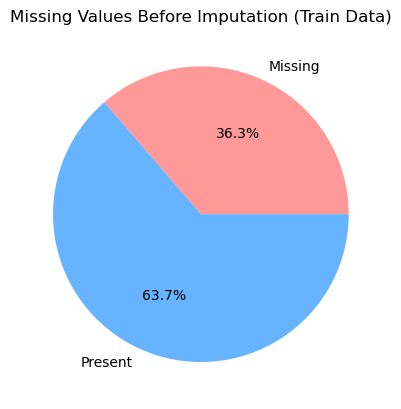

Test Data Before Imputation


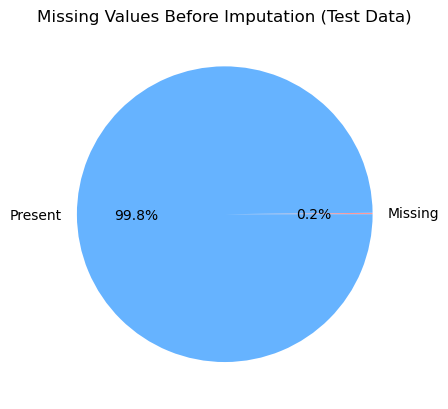

Train Data After Imputation


Test Data After Imputation


In [111]:
# Define the AccLocImputer class
class AccLocImputer:
    def __init__(self, df):
        self.df = df.copy()
        self.label_encoder_accloc = LabelEncoder()

    def encode_column(self, df, column_name, label_encoder):
        """Encode a specified column to numerical values, maintaining np.nan as missing values."""
        non_null = df[column_name].dropna()
        encoded_non_null = label_encoder.fit_transform(non_null)
        df.loc[non_null.index, column_name + '_encoded'] = encoded_non_null
        return df

    def impute_accloc(self):
        """Impute 'ACCLOC' using KNNImputer."""
        # Encode the ACCLOC column
        self.df = self.encode_column(self.df, 'ACCLOC', self.label_encoder_accloc)
        
        # Apply KNNImputer
        imputer = KNNImputer(n_neighbors=5)
        self.df[['ACCLOC_encoded']] = imputer.fit_transform(self.df[['ACCLOC_encoded']])
        
        # Decode the ACCLOC column back to original categories
        self.df['ACCLOC'] = self.label_encoder_accloc.inverse_transform(self.df['ACCLOC_encoded'].round().astype(int))
        self.df.drop(columns=['ACCLOC_encoded'], inplace=True, errors='ignore')
        return self.df

# Function to plot missing values
def plot_missing_values(df, column, title):
    missing_values = df[column].isna().sum()
    total_values = len(df)
    plt.pie([missing_values, total_values - missing_values], labels=['Missing', 'Present'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
    plt.title(title)
    plt.show()

# Assuming you have your dataframes trf_collision_train_df and trf_collision_test_df defined

# Plot missing values before imputation
print("Train Data Before Imputation")
plot_missing_values(trf_collision_train_df, 'ACCLOC', 'Missing Values Before Imputation (Train Data)')

print("Test Data Before Imputation")
plot_missing_values(trf_collision_test_df, 'ACCLOC', 'Missing Values Before Imputation (Test Data)')

# Create the imputer instance for training data
train_imputer = AccLocImputer(trf_collision_train_df)
trf_collision_train_df = train_imputer.impute_accloc()

# Create the imputer instance for test data
test_imputer = AccLocImputer(trf_collision_test_df)
trf_collision_test_df = test_imputer.impute_accloc()

# Plot missing values after imputation
print("Train Data After Imputation")
plot_missing_values(trf_collision_train_df, 'ACCLOC', 'Missing Values After Imputation (Train Data)')

print("Test Data After Imputation")
plot_missing_values(trf_collision_test_df, 'ACCLOC', 'Missing Values After Imputation (Test Data)')

### "STREET2" COLUMN

In [112]:
# Street 2 is missing when street 1 is address of home so imputing street 2 with 'Not Required'
trf_collision_train_df['STREET2'] = trf_collision_train_df['STREET2'].fillna('Not required')

trf_collision_test_df['STREET2'] = trf_collision_test_df['STREET2'].fillna('Not required')

### 'VISIBILITY', 'RDSFCOND', 'INVTYPE', 'VEHTYPE', 'TRAFFCTL' COLUMN

In [113]:
# Checking dor null values
trf_collision_train_df['VISIBILITY'].isna().sum()

14

In [114]:
# Checking dor null values
trf_collision_train_df['RDSFCOND'].isna().sum()

19

In [115]:
# Checking dor null values
trf_collision_train_df['INVTYPE'].isna().sum()

10

In [116]:
# Checking dor null values
trf_collision_train_df['VEHTYPE'].isna().sum()

0

In [117]:
# Checking dor null values
trf_collision_train_df['TRAFFCTL'].isna().sum()

29

In [118]:
class DataImputer:
    def __init__(self, dataframe, columns_to_impute):
        """
        Initializes the DataImputer class.

        Parameters:
        - dataframe: pd.DataFrame : The input DataFrame with columns to be imputed.
        - columns_to_impute: list : List of column names to impute.
        """
        self.dataframe = dataframe
        self.columns_to_impute = columns_to_impute
        self.label_encoders = {}

    def encode_columns(self):
        """
        Encodes the categorical columns using LabelEncoder.

        Returns:
        - pd.DataFrame : DataFrame with encoded columns.
        """
        for col in self.columns_to_impute:
            le = LabelEncoder()
            self.dataframe[col] = le.fit_transform(self.dataframe[col].astype(str))  # Convert to string to handle NaN
            self.label_encoders[col] = le
        return self.dataframe

    def impute_missing_values(self):
        """
        Imputes missing values in the specified columns using IterativeImputer with RandomForestClassifier.

        Returns:
        - pd.DataFrame : DataFrame with imputed columns.
        """
        # Prepare the IterativeImputer
        imputer = IterativeImputer(
            estimator=RandomForestClassifier(n_estimators=10, random_state=42),
            random_state=42, max_iter=10, verbose=2
        )

        # Impute the data
        self.dataframe[self.columns_to_impute] = imputer.fit_transform(self.dataframe[self.columns_to_impute])
        return self.dataframe

    def decode_columns(self):
        """
        Decodes the encoded columns back to their original categorical values.

        Returns:
        - pd.DataFrame : DataFrame with decoded columns.
        """
        for col in self.columns_to_impute:
            self.dataframe[col] = self.label_encoders[col].inverse_transform(self.dataframe[col].astype(int))
        return self.dataframe

    def process_data(self):
        """
        Encodes, imputes, and decodes the specified columns in the DataFrame.

        Returns:
        - pd.DataFrame : The processed DataFrame with imputed and decoded columns.
        """
        self.encode_columns()
        self.impute_missing_values()
        self.decode_columns()
        return self.dataframe
    
# Columns to impute
columns_to_impute = ['VISIBILITY', 'RDSFCOND', 'INVTYPE', 'VEHTYPE', 'TRAFFCTL']

# Create an instance of the DataImputer class
data_imputer_train = DataImputer(trf_collision_train_df, columns_to_impute)

# Process the data to encode, impute, and decode
trf_collision_train_df = data_imputer_train.process_data()

# Create an instance of the DataImputer class
data_imputer_test = DataImputer(trf_collision_test_df, columns_to_impute)

# Process the data to encode, impute, and decode
trf_collision_test_df = data_imputer_test.process_data()

[IterativeImputer] Completing matrix with shape (15000, 5)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.26
[IterativeImputer] Change: 0.0, scaled tolerance: 0.027 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (3956, 5)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.12
[IterativeImputer] Change: 0.0, scaled tolerance: 0.026000000000000002 
[IterativeImputer] Early stopping criterion reached.


#### The output we see demonstrates that the IterativeImputer has successfully imputed the missing values in your categorical features. It reached an early stopping point, suggesting that the imputation process was efficient and has converged on a reliable solution. This is a positive sign that your data is now better prepared for modeling.

### "INVAGE" COLUMN

In [119]:
trf_collision_train_df['INVAGE'].unique()

array(['50 to 54', '15 to 19', '55 to 59', '20 to 24', 'unknown',
       '25 to 29', '10 to 14', '30 to 34', '45 to 49', '75 to 79',
       '35 to 39', '40 to 44', '80 to 84', '60 to 64', '85 to 89',
       '65 to 69', '70 to 74', '5 to 9', '0 to 4', '90 to 94', 'Over 95'],
      dtype=object)

In [120]:
# Handling INVAGE 
# Function to convert age range to midpoint
def convert_age_range(age_range):
    if age_range == 'unknown':
        return np.nan  # Assign NaN for 'unknown' or handle it separately
    elif age_range == 'Over 95':
        return 97.5  # Assign a reasonable value for 'Over 95'
    else:
        # Extract the numbers from the string
        lower, upper = map(int, age_range.split(' to '))
        # Calculate the midpoint
        return (lower + upper) / 2

# Apply the function to the INVAGE column
trf_collision_train_df['INVAGE'] = trf_collision_train_df['INVAGE'].apply(convert_age_range)
trf_collision_test_df['INVAGE'] = trf_collision_test_df['INVAGE'].apply(convert_age_range)

In [121]:
# Generate descriptive statistics
desc_stats = trf_collision_train_df['INVAGE'].describe()

# Display the descriptive statistics
print("Descriptive Statistics for INVAGE:")
print(desc_stats)

# Additional statistics
variance = trf_collision_train_df['INVAGE'].var()
print(f"Variance: {variance:.2f}")

plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(trf_collision_train_df['INVAGE'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of INVAGE')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=trf_collision_train_df['INVAGE'], color='lightgreen')
plt.title('Boxplot of INVAGE')
plt.xlabel('Age (Midpoint)')

plt.tight_layout()
plt.show()

Descriptive Statistics for INVAGE:
count    12507.000000
mean        42.455385
std         19.392695
min          2.000000
25%         27.000000
50%         42.000000
75%         57.000000
max         97.500000
Name: INVAGE, dtype: float64
Variance: 376.08


C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



In [122]:
trf_collision_train_df['INVAGE'].unique()

array([52. , 17. , 57. , 22. ,  nan, 27. , 12. , 32. , 47. , 77. , 37. ,
       42. , 82. , 62. , 87. , 67. , 72. ,  7. ,  2. , 92. , 97.5])

#### The INVAGE data is characterized by a right-skewed distribution with a central tendency around 40-42. The data is moderately spread out, and there are a few potential outliers on the higher end.

Train Data Before Imputation


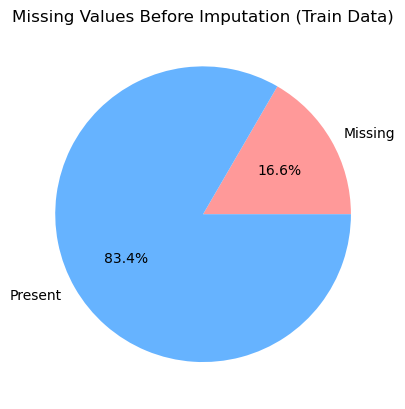

Test Data Before Imputation


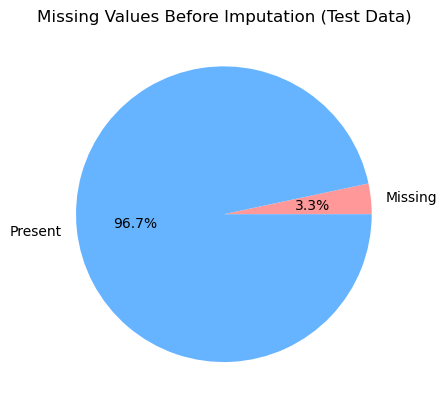

Train Data After Imputation


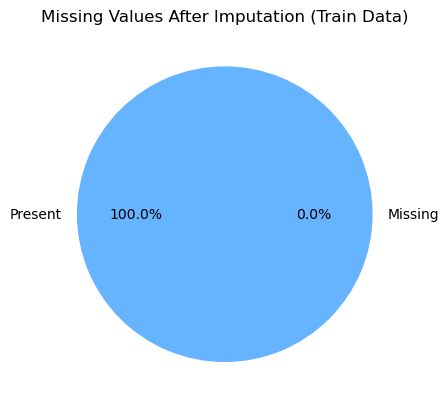

Test Data After Imputation


In [123]:
# Function to plot missing values
def plot_missing_values(df, column, title):
    missing_values = df[column].isna().sum()
    total_values = len(df)
    plt.pie([missing_values, total_values - missing_values], labels=['Missing', 'Present'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
    plt.title(title)
    plt.show()

# Plot missing values before imputation
print("Train Data Before Imputation")
plot_missing_values(trf_collision_train_df, 'INVAGE', 'Missing Values Before Imputation (Train Data)')

print("Test Data Before Imputation")
plot_missing_values(trf_collision_test_df, 'INVAGE', 'Missing Values Before Imputation (Test Data)')

# Apply the imputer to the INVAGE column
imputer = IterativeImputer(random_state=0)
trf_collision_train_df['INVAGE'] = imputer.fit_transform(trf_collision_train_df[['INVAGE']]).flatten()
trf_collision_test_df['INVAGE'] = imputer.transform(trf_collision_test_df[['INVAGE']]).flatten()

# Plot missing values after imputation
print("Train Data After Imputation")
plot_missing_values(trf_collision_train_df, 'INVAGE', 'Missing Values After Imputation (Train Data)')

print("Test Data After Imputation")
plot_missing_values(trf_collision_test_df, 'INVAGE', 'Missing Values After Imputation (Test Data)')

#### We have handled all the missing values in the column "INVAGE"

### DROP "MANOEUVER" COLUMN

In [124]:
trf_collision_train_df.drop(columns = 'MANOEUVER', inplace = True)
trf_collision_test_df.drop(columns = 'MANOEUVER', inplace = True)

### Handling 'CYCLIST', 'AUTOMOBILE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'PEDESTRIAN', 'MOTORCYCLE', 'EMERG_VEH' COLUMNS

In [125]:
# Columns to check and handle missing values
columns_to_check = [
    'CYCLIST', 'AUTOMOBILE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER',
    'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'PEDESTRIAN', 'MOTORCYCLE', 'EMERG_VEH'
]

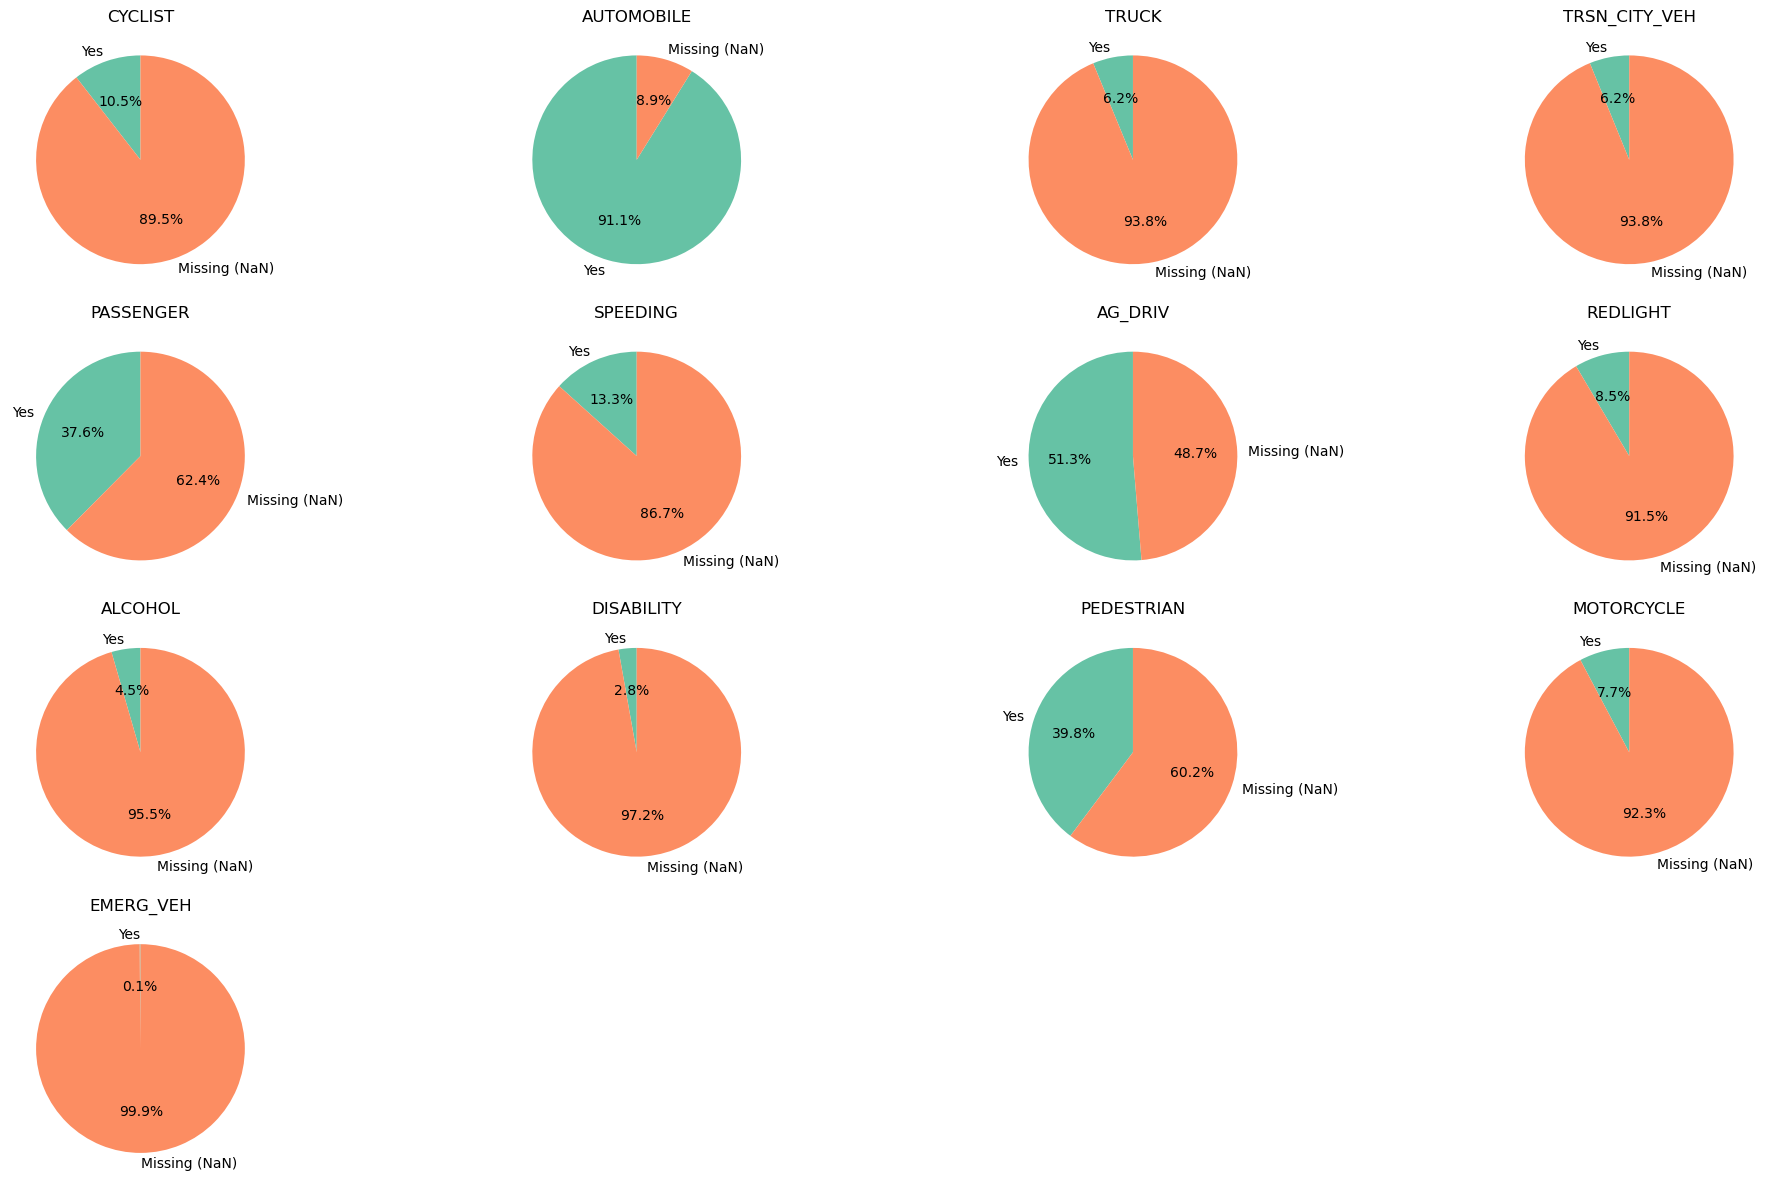

In [126]:
# Plot the columns to check the missing values
plt.figure(figsize=(20, 12))
for i, column in enumerate(columns_to_check):
    # Count the 'Yes' and NaN values
    yes_count = trf_collision_train_df[column].eq('Yes').sum()
    nan_count = trf_collision_train_df[column].isna().sum()
    
    # Prepare labels and sizes
    labels = ['Yes', 'Missing (NaN)']
    sizes = [yes_count, nan_count]
    
    # Plot each pie chart
    plt.subplot(4, 4, i + 1)
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66c2a5', '#fc8d62']
    )
    plt.title(column)

# Adjust layout
plt.tight_layout()
plt.show()

#### As we can see most of the columns are either Yes or NaN so 'NaN' means that it is No

In [127]:
# Impute missing values in specified columns of the DataFrames with the string 'No'
def impute_nan_to_no(X, columns):
    for column in columns:
        X[column] = X[column].fillna('No')
    return X

# Apply the imputation function to train and test dataframes
trf_collision_train_df = impute_nan_to_no(trf_collision_train_df, columns_to_check)
trf_collision_test_df = impute_nan_to_no(trf_collision_test_df, columns_to_check)

In [128]:
print(trf_collision_train_df[columns_to_check].isna().sum())
print(trf_collision_test_df[columns_to_check].isna().sum())

CYCLIST          0
AUTOMOBILE       0
TRUCK            0
TRSN_CITY_VEH    0
PASSENGER        0
SPEEDING         0
AG_DRIV          0
REDLIGHT         0
ALCOHOL          0
DISABILITY       0
PEDESTRIAN       0
MOTORCYCLE       0
EMERG_VEH        0
dtype: int64
CYCLIST          0
AUTOMOBILE       0
TRUCK            0
TRSN_CITY_VEH    0
PASSENGER        0
SPEEDING         0
AG_DRIV          0
REDLIGHT         0
ALCOHOL          0
DISABILITY       0
PEDESTRIAN       0
MOTORCYCLE       0
EMERG_VEH        0
dtype: int64


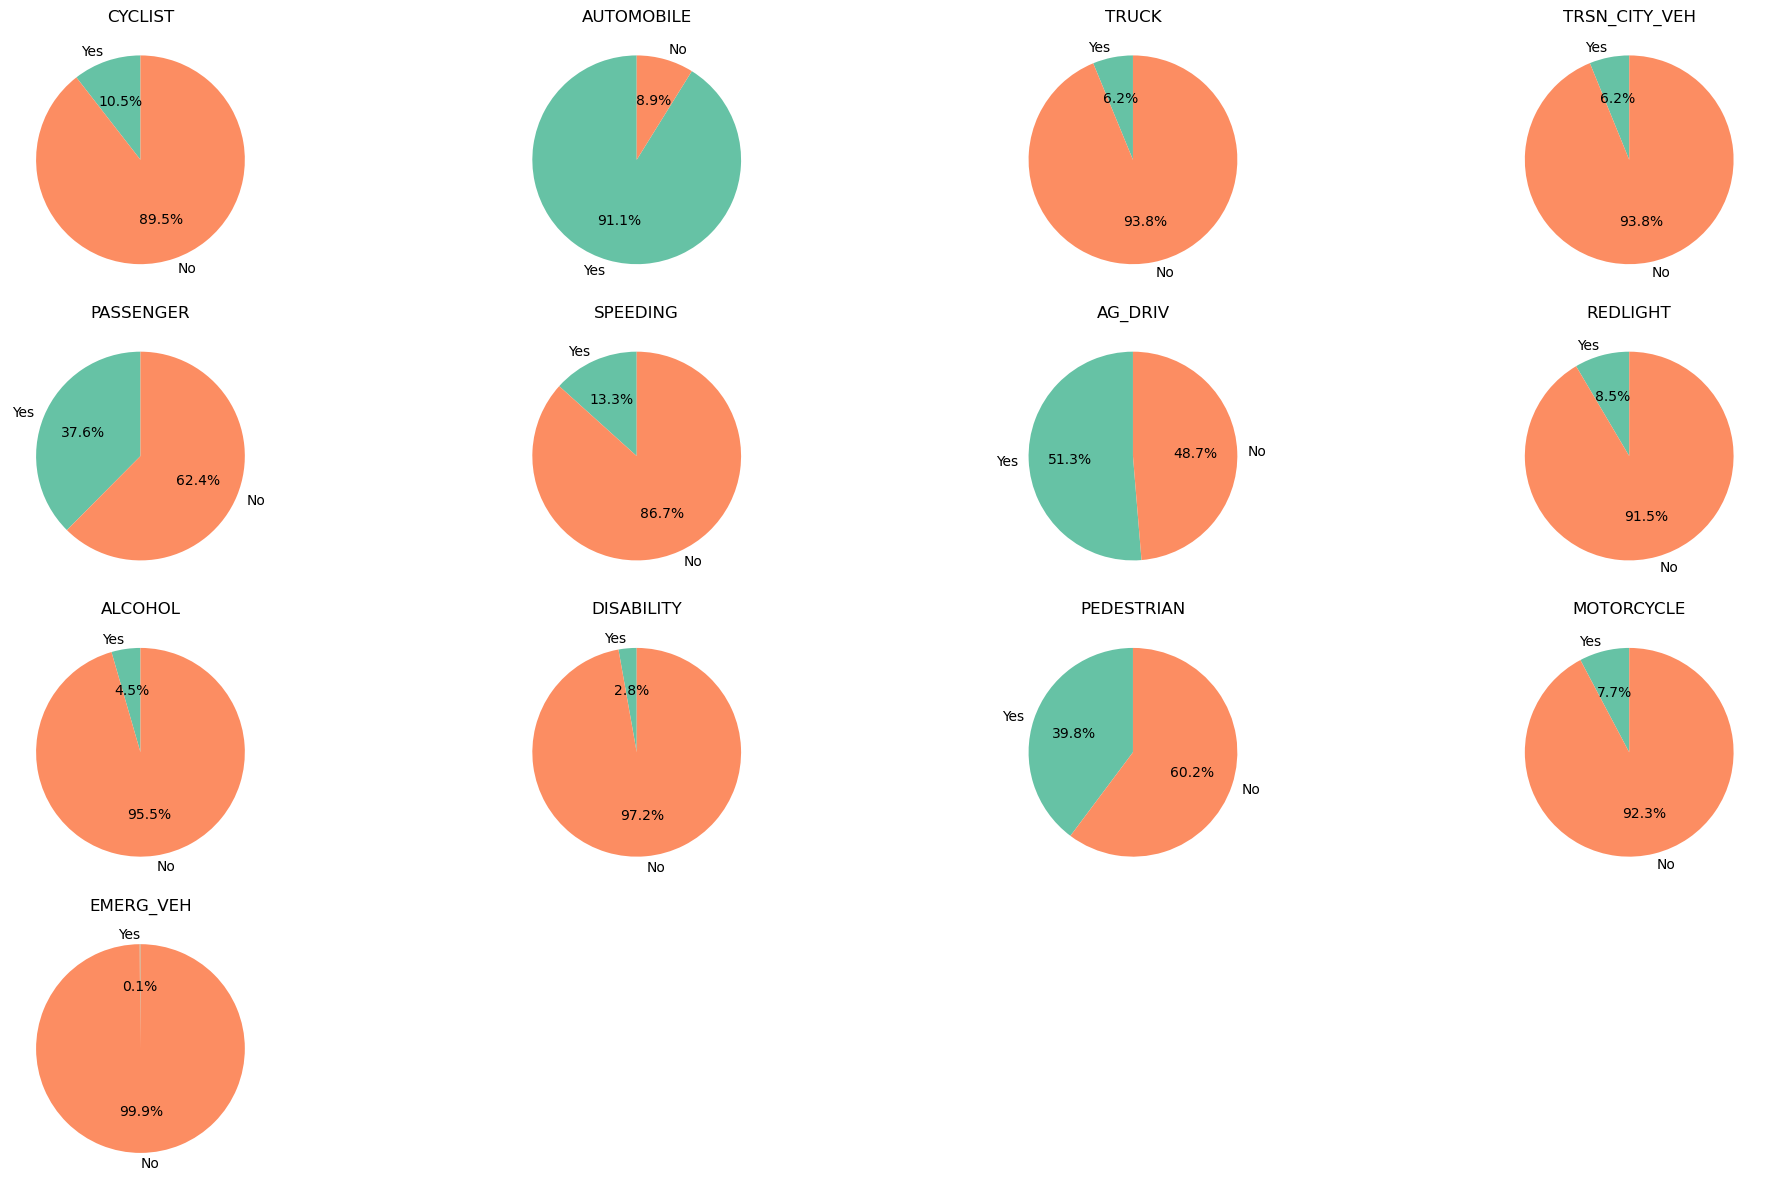

In [129]:
# Plot the columns to check if the missing values have been handled
plt.figure(figsize=(20, 12))
for i, column in enumerate(columns_to_check):
    # Count the 'Yes' and 'No' values
    yes_count = trf_collision_train_df[column].eq('Yes').sum()
    no_count = trf_collision_train_df[column].eq('No').sum()
    
    # Prepare labels and sizes
    labels = ['Yes', 'No']
    sizes = [yes_count, no_count]
    
    # Plot each pie chart
    plt.subplot(4, 4, i + 1)
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66c2a5', '#fc8d62']
    )
    plt.title(column)

# Adjust layout
plt.tight_layout()
plt.show()

#### In the code 'PEDESTRIAN' or 'CYCLIST' is 'No', the related columns ('PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND') are set to 'Not required'. This approach acknowledges that if there was no pedestrian or cyclist involved, their specific details are not needed. Thus, you avoid imputing potentially misleading or incorrect values for these detailed columns.

In [130]:
# Define the function to impute pedestrian columns
def impute_ped_columns(row):
    if row['PEDESTRIAN'] == 'No':
        return 'Not required', 'Not required', 'Not required'
    return row['PEDTYPE'], row['PEDACT'], row['PEDCOND']

# Apply the function to the train and test dataframes
trf_collision_train_df[['PEDTYPE', 'PEDACT', 'PEDCOND']] = trf_collision_train_df.apply(
    lambda row: impute_ped_columns(row), axis=1, result_type='expand'
)

trf_collision_test_df[['PEDTYPE', 'PEDACT', 'PEDCOND']] = trf_collision_test_df.apply(
    lambda row: impute_ped_columns(row), axis=1, result_type='expand'
)


# Define the function to impute cyclist columns
def impute_cyclist_columns(row):
    if row['CYCLIST'] == 'No':
        return 'Not required', 'Not required', 'Not required'
    return row['CYCLISTYPE'], row['CYCACT'], row['CYCCOND']

# Apply the function to the train and test dataframes
trf_collision_train_df[['CYCLISTYPE', 'CYCACT', 'CYCCOND']] = trf_collision_train_df.apply(
    lambda row: impute_cyclist_columns(row), axis=1, result_type='expand'
)

trf_collision_test_df[['CYCLISTYPE', 'CYCACT', 'CYCCOND']] = trf_collision_test_df.apply(
    lambda row: impute_cyclist_columns(row), axis=1, result_type='expand'
)

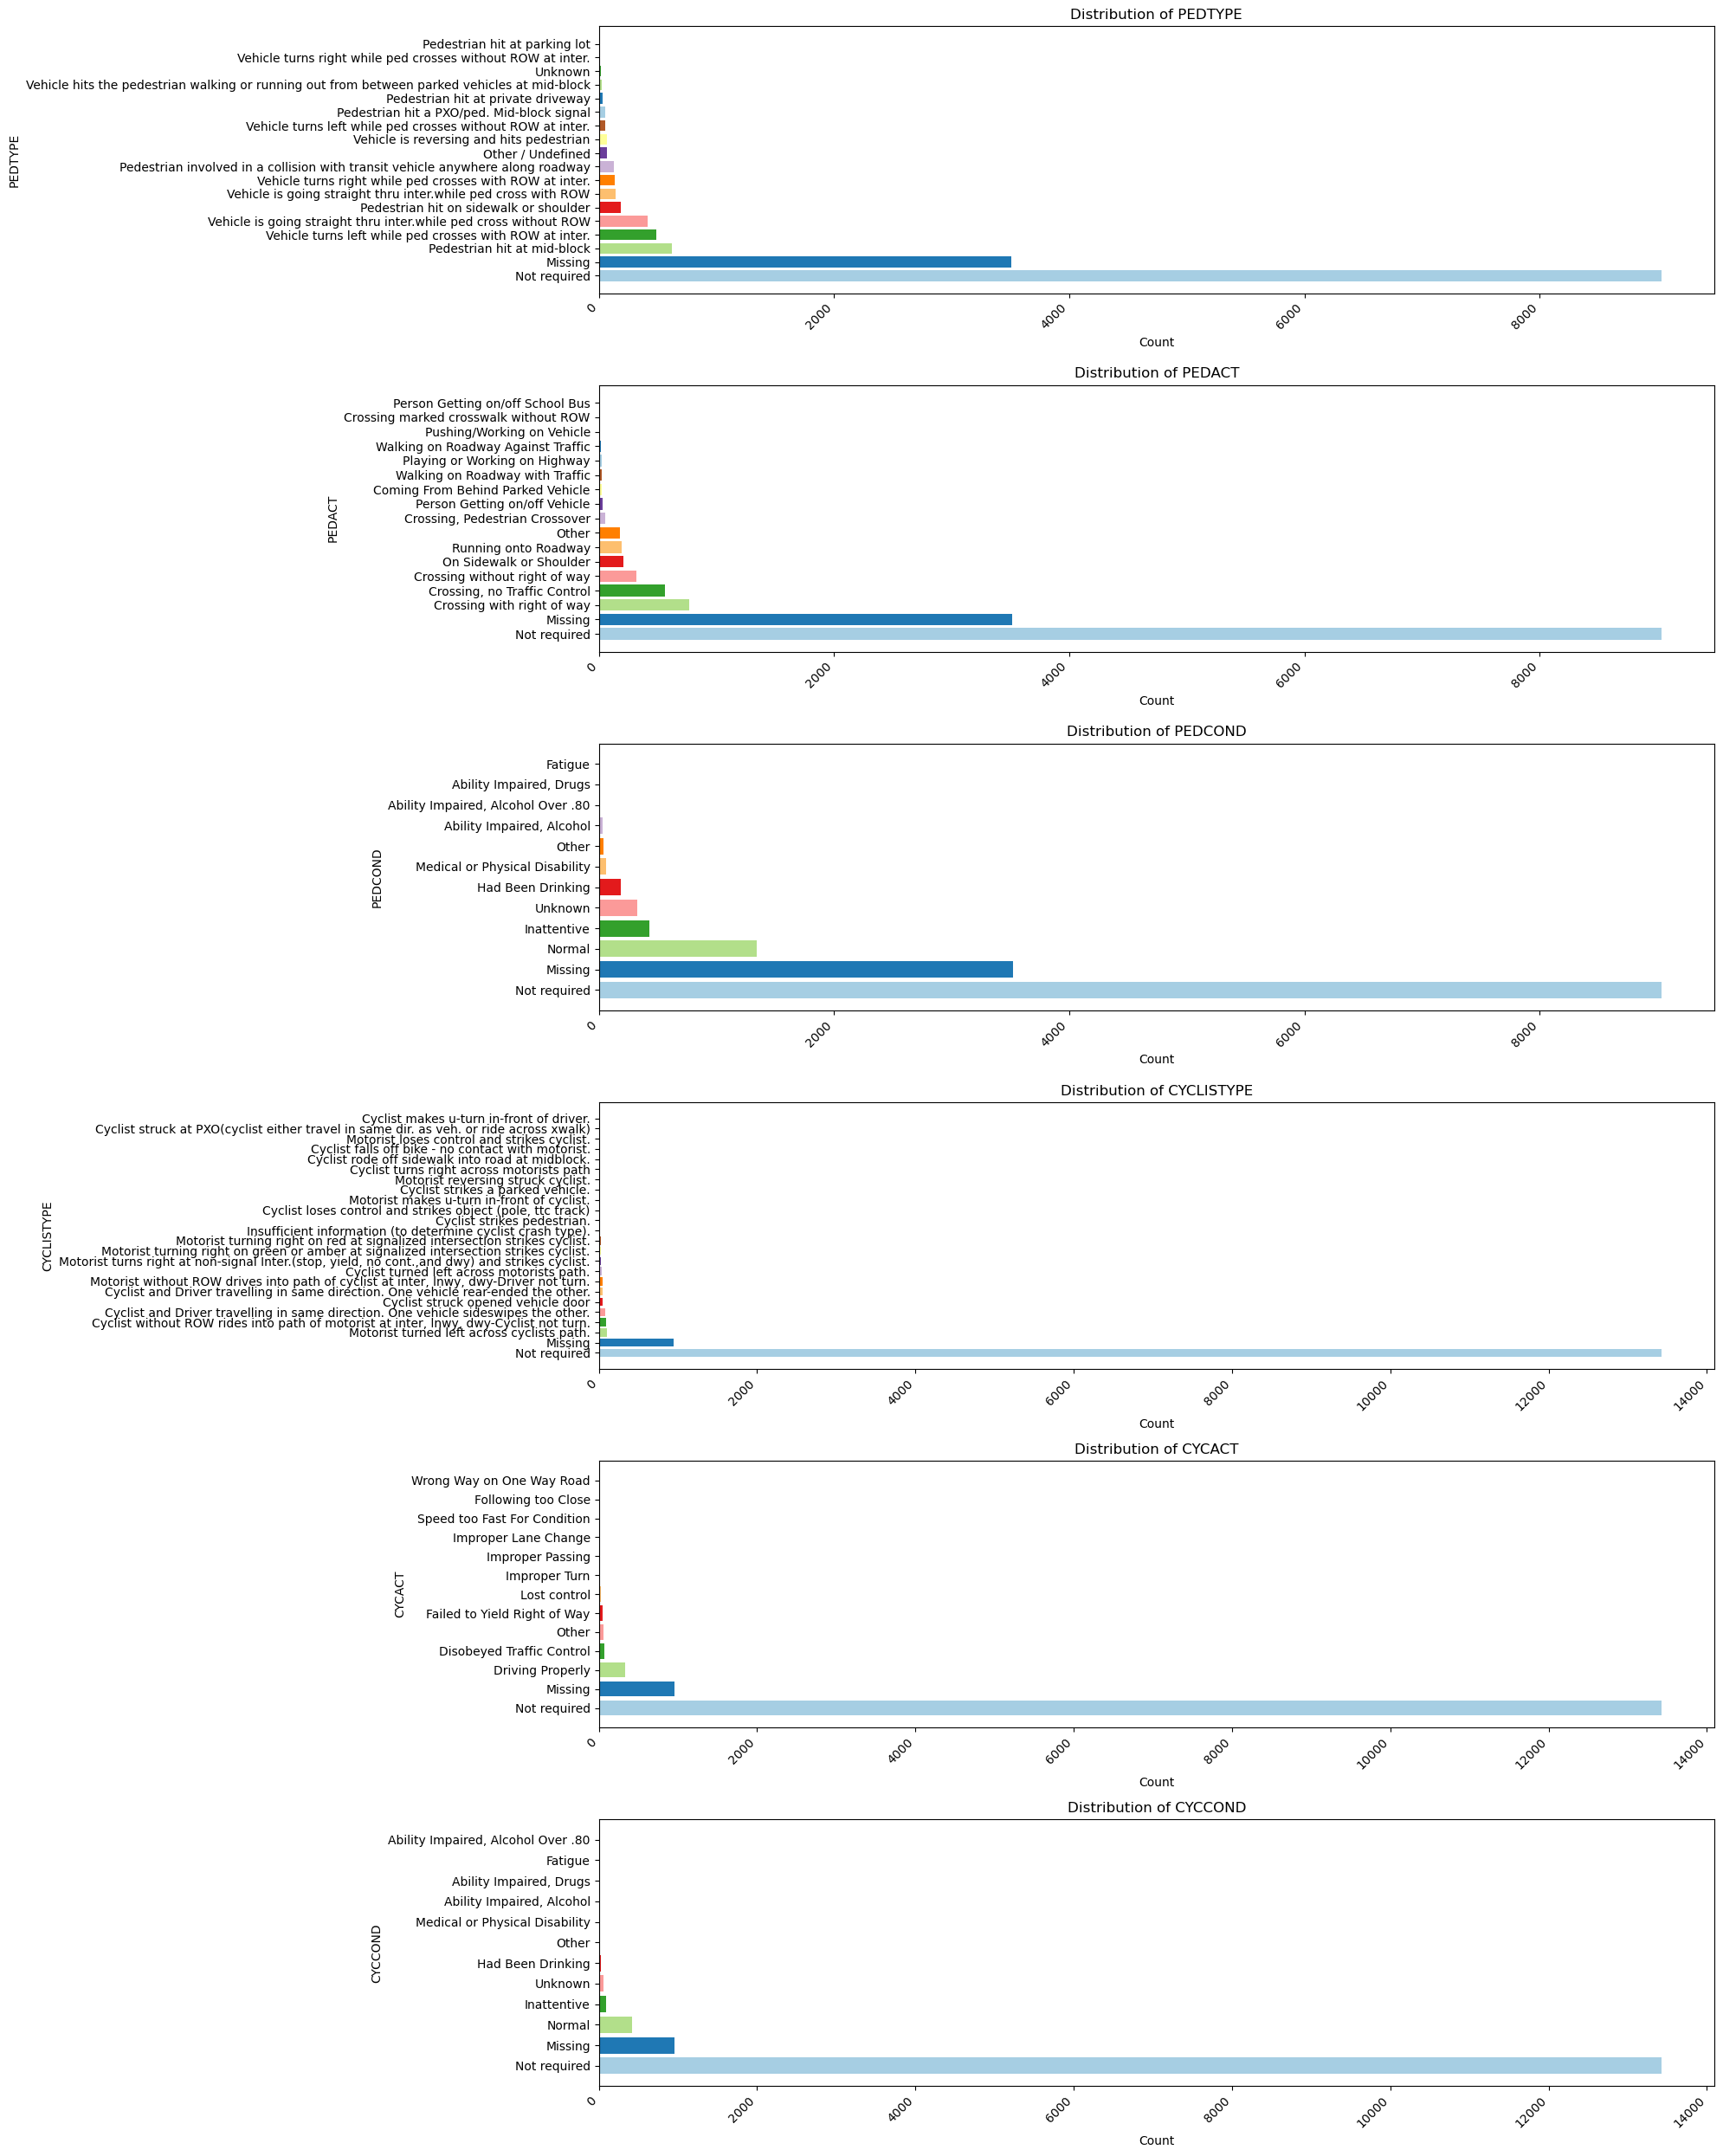

In [131]:
# Columns to plot
columns_to_plot = ['PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND']

plt.figure(figsize=(20, 25))
for i, column in enumerate(columns_to_plot):
    # Count occurrences of each category
    value_counts = trf_collision_train_df[column].value_counts(dropna=False)
    
    # Prepare labels and sizes
    labels = value_counts.index.tolist()
    sizes = value_counts.values.tolist()
    
    # Replace np.nan with 'Missing' in labels for clarity
    labels = ['Missing' if pd.isna(label) else label for label in labels]
    
    # Plot each bar chart
    plt.subplot(len(columns_to_plot), 1, i + 1)
    plt.barh(labels, sizes, color=plt.cm.Paired.colors[:len(labels)])
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

In [132]:
# Define the function to impute with mode
def impute_with_mode(dataframe, columns):
    """
    Imputes missing values in the specified columns with the mode (most frequent value).

    Parameters:
    - dataframe: pd.DataFrame : The DataFrame containing the columns to impute.
    - columns: list : List of column names to impute with mode.

    Returns:
    - pd.DataFrame : The DataFrame with imputed values.
    """
    for column in columns:
        mode_value = dataframe[column].mode().iloc[0]
        dataframe[column].fillna(mode_value, inplace=True)
    return dataframe

In [133]:
# List of columns to impute with mode
mode_impute_column_list =  ['PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND']

# Impute missing values with mode for train and test dataframes
trf_collision_train_df = impute_with_mode(trf_collision_train_df, mode_impute_column_list)
trf_collision_test_df = impute_with_mode(trf_collision_test_df, mode_impute_column_list)

In [134]:
trf_collision_train_df.isna().sum()

TIME                 0
STREET1              0
STREET2              0
ROAD_CLASS           0
DISTRICT             0
LATITUDE             0
LONGITUDE            0
ACCLOC               0
TRAFFCTL             0
VISIBILITY           0
LIGHT                0
RDSFCOND             0
ACCLASS              0
IMPACTYPE            0
INVTYPE              0
INVAGE               0
INJURY               0
VEHTYPE              0
PEDTYPE              0
PEDACT               0
PEDCOND              0
CYCLISTYPE           0
CYCACT               0
CYCCOND              0
PEDESTRIAN           0
CYCLIST              0
AUTOMOBILE           0
MOTORCYCLE           0
TRUCK                0
TRSN_CITY_VEH        0
EMERG_VEH            0
PASSENGER            0
SPEEDING             0
AG_DRIV              0
REDLIGHT             0
ALCOHOL              0
DISABILITY           0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
DIVISION             0
dtype: int64

In [135]:
trf_collision_train_df.dtypes

TIME                   int64
STREET1               object
STREET2               object
ROAD_CLASS           float64
DISTRICT              object
LATITUDE             float64
LONGITUDE            float64
ACCLOC                object
TRAFFCTL              object
VISIBILITY            object
LIGHT                 object
RDSFCOND              object
ACCLASS               object
IMPACTYPE             object
INVTYPE               object
INVAGE               float64
INJURY                object
VEHTYPE               object
PEDTYPE               object
PEDACT                object
PEDCOND               object
CYCLISTYPE            object
CYCACT                object
CYCCOND               object
PEDESTRIAN            object
CYCLIST               object
AUTOMOBILE            object
MOTORCYCLE            object
TRUCK                 object
TRSN_CITY_VEH         object
EMERG_VEH             object
PASSENGER             object
SPEEDING              object
AG_DRIV               object
REDLIGHT      

### "ACCLASS" COLUMN

In [136]:
trf_collision_train_df['ACCLASS'].unique()

array(['Non-Fatal Injury', 'Fatal'], dtype=object)

In [137]:
def preprocess_data(df):
    """
    Preprocess the DataFrame by applying Label Encoding to all categorical columns.

    Parameters:
    df (pd.DataFrame): The input DataFrame to preprocess.
    target_col (str): The name of the target column (not used in this version).

    Returns:
    pd.DataFrame: A DataFrame with all categorical columns label encoded, retaining original column names.
    """
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Apply Label Encoding to all categorical columns
    label_encoders = {}
    for column in categorical_columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

    return df, label_encoders

train_df, train_encoders = preprocess_data(trf_collision_train_df)
test_df, test_encoders = preprocess_data(trf_collision_test_df)

### Implementing  "PCA" "LogisticRegression" "RandomForest" "DecisionTree" "KNeighbors" "GradientBoosting" "Randomized Search"

#### Data Preparation

In [138]:
# Set the target column
target_column_name = 'ACCLASS'

# Split the data into features and target
X = train_df.drop(columns=[target_column_name])
y = train_df[target_column_name].astype(int)  # Ensure target is an integer

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to the features
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

#### Model Training and Evaluation without Hyperparameter Tuning

In [139]:
# Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=70),
    'DecisionTree': DecisionTreeClassifier(max_depth=10),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Placeholder for results
results_no_tuning = {}

# Train, evaluate, and predict with models
for name, model in models.items():
    # Create pipeline with scaling, PCA, and model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('model', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred_val = pipeline.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    results_no_tuning[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_val, y_pred_val),
        'confusion_matrix': confusion_matrix(y_val, y_pred_val)
    }
    
    # Predict on test data
    test_df_scaled = test_df.drop(columns=['OBJECTID'])
    test_prediction = pipeline.predict(test_df_scaled)
    
    # Create results DataFrame
    result_df = pd.DataFrame()
    result_df['OBJECTID'] = test_df['OBJECTID']
    result_df['ACCLASS'] = test_prediction
    result_df['ACCLASS'] = result_df['ACCLASS'].apply(lambda x: 'Non-Fatal Injury' if x == 1 else 'Fatal')
    
    # Save results to CSV
    result_df.to_csv(f'results_{name}_no_tuning.csv', index=False)

# Print results
for model_name, metrics in results_no_tuning.items():
    print(f"{model_name} Accuracy: {metrics['accuracy']:.2f}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("Confusion Matrix:\n", metrics['confusion_matrix'])


LogisticRegression Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.12      0.21       389
           1       0.88      0.99      0.93      2611

    accuracy                           0.88      3000
   macro avg       0.78      0.56      0.57      3000
weighted avg       0.86      0.88      0.84      3000

Confusion Matrix:
 [[  48  341]
 [  24 2587]]
RandomForest Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.25      0.39       389
           1       0.90      1.00      0.95      2611

    accuracy                           0.90      3000
   macro avg       0.92      0.62      0.67      3000
weighted avg       0.91      0.90      0.87      3000

Confusion Matrix:
 [[  96  293]
 [   5 2606]]
DecisionTree Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.32      0

#### Hyperparameter Tuning using Randomized Search

In [140]:
# Define the parameter distributions for the models
param_dist_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

param_dist_gb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5],
    'model__subsample': [0.8, 0.9]
}

param_dist_lr = {
    'model__C': [0.1, 1.0, 10],
    'model__solver': ['lbfgs', 'liblinear']
}

param_dist_dt = {
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

param_dist_knn = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

# Create pipelines for models
pipelines = {
    'RandomForest': Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)), ('model', RandomForestClassifier(random_state=42))]),
    'GradientBoosting': Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)), ('model', GradientBoostingClassifier(random_state=42))]),
    'LogisticRegression': Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)), ('model', LogisticRegression(max_iter=1000))]),
    'DecisionTree': Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)), ('model', DecisionTreeClassifier())]),
    'KNeighbors': Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)), ('model', KNeighborsClassifier())])
}

param_dists = {
    'RandomForest': param_dist_rf,
    'GradientBoosting': param_dist_gb,
    'LogisticRegression': param_dist_lr,
    'DecisionTree': param_dist_dt,
    'KNeighbors': param_dist_knn
}

# Placeholder for results
results_with_tuning = {}

# Stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search
for name, pipeline in pipelines.items():
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dists[name],
        scoring='accuracy',
        cv=cv,
        n_iter=5,  # Reduced iterations for faster execution
        random_state=42,
        n_jobs=-1  # Utilize all available cores
    )

    random_search.fit(X_train, y_train)

    best_pipeline = random_search.best_estimator_

    # Evaluate the best model on the validation set
    y_pred_val = best_pipeline.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    results_with_tuning[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_val, y_pred_val),
        'confusion_matrix': confusion_matrix(y_val, y_pred_val),
        'best_pipeline': best_pipeline  # Store the best pipeline to later dump the model for Flask
    }

    # Predict on test data
    test_df_scaled = test_df.drop(columns=['OBJECTID'])
    test_prediction = best_pipeline.predict(test_df_scaled)

    # Create results DataFrame
    result_df = pd.DataFrame()
    result_df['OBJECTID'] = test_df['OBJECTID']
    result_df['ACCLASS'] = test_prediction
    result_df['ACCLASS'] = result_df['ACCLASS'].apply(lambda x: 'Non-Fatal Injury' if x == 1 else 'Fatal')

    # Save results to CSV
    result_df.to_csv(f'results_{name}_with_tuning.csv', index=False)

# Print results
for model_name, metrics in results_with_tuning.items():
    print(f"{model_name} with Tuning Accuracy: {metrics['accuracy']:.2f}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("Confusion Matrix:\n", metrics['confusion_matrix'])

RandomForest with Tuning Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.10      0.18       389
           1       0.88      1.00      0.94      2611

    accuracy                           0.88      3000
   macro avg       0.94      0.55      0.56      3000
weighted avg       0.90      0.88      0.84      3000

Confusion Matrix:
 [[  39  350]
 [   0 2611]]
GradientBoosting with Tuning Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.21      0.33       389
           1       0.89      0.99      0.94      2611

    accuracy                           0.89      3000
   macro avg       0.85      0.60      0.64      3000
weighted avg       0.88      0.89      0.86      3000

Confusion Matrix:
 [[  82  307]
 [  21 2590]]
LogisticRegression with Tuning Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support



#### Visualization

C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



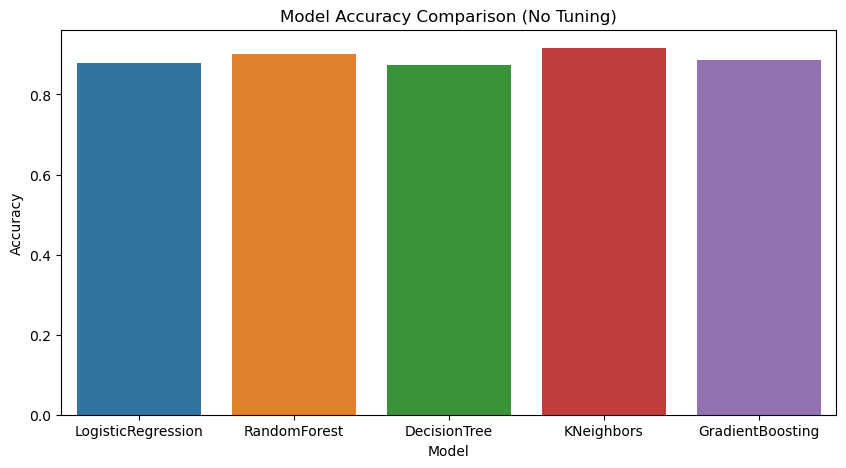

C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



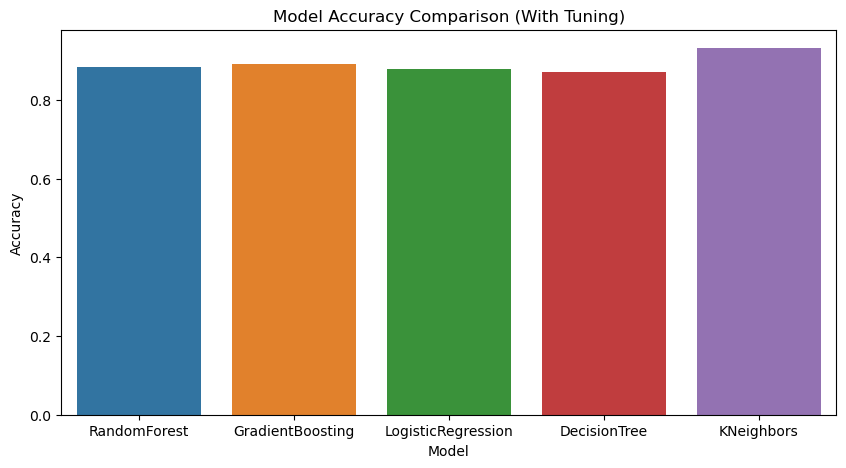

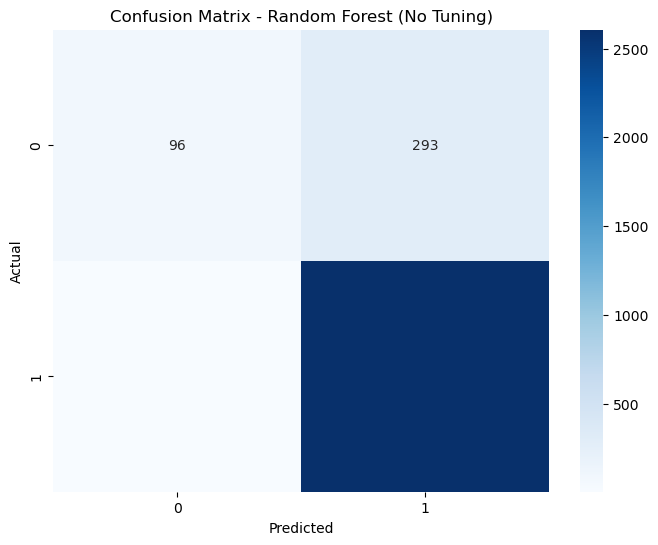

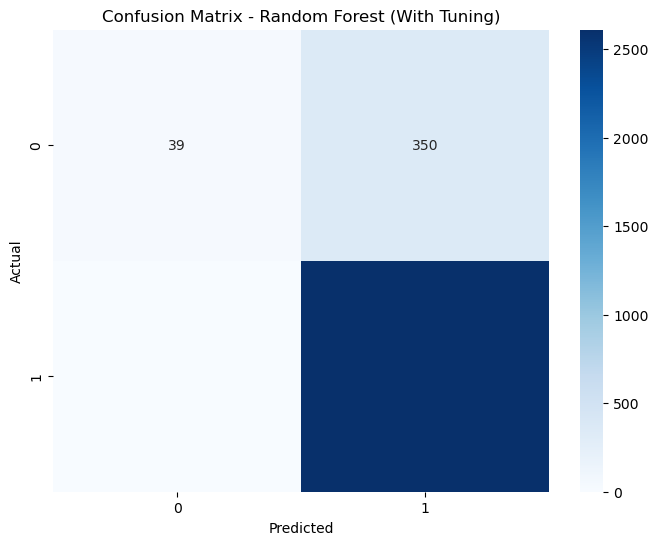

In [141]:
# Plot accuracy of different models (without tuning)
model_names_no_tuning = list(results_no_tuning.keys())
accuracies_no_tuning = [results_no_tuning[name]['accuracy'] for name in model_names_no_tuning]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names_no_tuning, y=accuracies_no_tuning)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (No Tuning)')
plt.show()

# Plot accuracy for models (with tuning)
model_names_with_tuning = list(results_with_tuning.keys())
accuracies_with_tuning = [results_with_tuning[name]['accuracy'] for name in model_names_with_tuning]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names_with_tuning, y=accuracies_with_tuning)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (With Tuning)')
plt.show()

# Plot confusion matrix for the best model without tuning (RandomForest)
conf_matrix_no_tuning = results_no_tuning['RandomForest']['confusion_matrix']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_no_tuning, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (No Tuning)')
plt.show()

# Plot confusion matrix for the best model with tuning (RandomForest)
conf_matrix_with_tuning = results_with_tuning['RandomForest']['confusion_matrix']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_with_tuning, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (With Tuning)')
plt.show()

### Model Accuracy Comparison
#### Overview
- The images compare the accuracy of different machine learning models applied to a dataset, both without hyperparameter tuning and with hyperparameter tuning. The models evaluated are Logistic Regression, Random Forest, Decision Tree, K-Nearest Neighbors (KNeighbors), and Gradient Boosting.

#### Without Hyperparameter Tuning

**Key Points:**
1. Logistic Regression: Achieved an accuracy slightly below 0.9.
2. Random Forest: Achieved an accuracy around 0.9.
3. Decision Tree: Slightly lower accuracy than Random Forest, around 0.85.
4. KNeighbors: Achieved the highest accuracy, close to 0.9.
5. Gradient Boosting: Similar accuracy to Logistic Regression, around 0.85.

**Inference:**
- All models perform reasonably well without tuning, with KNeighbors performing the best.
- Decision Tree and Gradient Boosting show slightly lower accuracy compared to other models.

#### With Hyperparameter Tuning

**Key Points:**
1. Random Forest: Maintains accuracy around 0.9.
2. Gradient Boosting: Improved accuracy, closer to 0.9.
3. Logistic Regression: Accuracy remains around 0.85.
4. Decision Tree: Accuracy remains around 0.85.
5. KNeighbors: Improved accuracy, the highest among all models, close to 0.95.

**Inference:**
- Hyperparameter tuning improves the performance of Gradient Boosting and KNeighbors.
- KNeighbors remains the best-performing model, achieving the highest accuracy.
- Other models show slight improvement or maintain their previous performance levels.

#### Conclusion
- KNeighbors is the most effective model both without and with tuning, particularly excelling after hyperparameter optimization.
- Gradient Boosting benefits significantly from hyperparameter tuning.
- Random Forest and Logistic Regression maintain consistent performance, with Random Forest being more robust overall.
- Decision Tree shows stable performance but doesn't significantly benefit from tuning in this case.

# Flask model export
After hyper tuning KNeighborsClassifier is performing well with this data so exporting this model for Flask

In [142]:
# After the loop, check if the KNeighbors model should be saved
if 'KNeighbors' in results_with_tuning:  # Check if the KNeighbors model was trained and stored in the results
    # Save the KNeighbors model to a .joblib file
    joblib.dump(results_with_tuning['KNeighbors']['best_pipeline'], 'knn_model_with_tuning.pkl')
